#  Hit Analysis

En Este notebook se realizara un estudio de todos los hits obtenidos y extraeremos información interesante.

Lo primero, vamos a dar una breve descripción de las caracteristicas obtenidas:
- <b>artist</b>: Indica el artista de la canción.
- <b>title</b>: Titulo de la canción.
- <b>id</b>: Identificador que da spotify a la canción.
- <b>year_chart</b>: Año de aparición de la canción en la lista Hot-100.
- <b>date_chart</b>: Fecha aparición en la lista Hot-100.
- <b>release_date</b>: Fecha de lanzamiento de la canción.
- <b>collaboration</b>: Indica si en la canción intervienen mas artistas que el principal.
- <b>rank</b>: Indica el puesto en el ranking para la fecha de aparición (date_chart).
- <b>weeks</b>: Numero de semanas de la canción siendo la ultima semana contabilizada la de la fecha de aparición (date_chart).
- <b>isNew</b>: Indica si una canción es la primera vez que aparece en la lista.
- <b>peakPos</b> : Indoca posicion mas alta en el ranking hasta la fecha.
- <b>lastPos</b>: Indica posicion en el ranking de la semana anterior.
- <b>danceability</b>: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- <b>energy</b>: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- <b>key</b>: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- <b>loudness</b>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- <b>mode</b>: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- <b>speechiness</b>: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- <b>acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- <b>instrumentalness</b>: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
- <b>liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- <b>valence</b>: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- <b>tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
- <b>time Signature</b>: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- <b>duration_ms</b>: The duration of the track in milliseconds.
- <b>popularity_artist</b>:The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.
- <b>popularity_song</b>: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
- <b>genres</b>:A list of the genres the artist is associated with.
- <b>album</b>: Nombre del album al que pertenece la canción.
- <b>label</b>: The label for the album.


In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

In [274]:
df_hits = pd.read_csv ("../Data/top_100_Billboard_1958_2020.csv",dtype={'song_lyrics':'string'})

In [275]:
pd.set_option('display.max_columns', None)

In [276]:
df_hits.head()

,artist,title,id,year_chart,date_chart,release_date,collaboration,rank,weeks,isNew,peakPos,lastPos,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity_artist,popularity_song,genres,album,label,song_lyrics,popularity
0,Ricky Nelson,Poor Little Fool - Remastered,5ayybTSXNwcarDtxQKqvWX,1958,1958-08-04,1958-07-01,False,1,1,True,1,0,0.474,0.338,0,-11.528,1,0.0299,0.6480,0.000000,0.130,0.810,154.596,4,153933,58,50,"['adult standards', 'brill building pop', 'bub...",Ricky Nelson (Expanded Edition / Remastered),Capitol Records,<NA>,NaN
1,Bobby Darin,Splish Splash,40fD7ct05FvQHLdQTgJelG,1958,1958-08-04,1958,False,3,1,True,3,0,0.645,0.943,0,-1.526,1,0.0393,0.3850,0.000000,0.370,0.965,147.768,4,131719,63,59,"['adult standards', 'brill building pop', 'eas...",Bobby Darin,Rhino Atlantic,<NA>,NaN
2,The Coasters,Yakety Yak,7demHL0GXA6YmTNqw3Btz8,1958,1958-08-04,2005-12-20,False,7,1,True,7,0,0.715,0.669,7,-9.491,1,0.1280,0.7050,0.000732,0.044,0.976,120.789,4,113040,54,58,"['adult standards', 'brill building pop', 'doo...",Rhino Hi-Five: The Coasters,Rhino/Elektra,<NA>,NaN
3,Jack Scott,My True Love,2Un1O9CChp4wyTmt422XwW,1958,1958-08-04,1990-03-12,False,8,1,True,8,0,0.548,0.253,4,-11.387,1,0.0279,0.8710,0.000099,0.138,0.238,68.184,3,165026,33,26,"['brill building pop', 'canadian rockabilly', ...",Jack Scott's Greatest Hits,Curb Records,<NA>,NaN
4,Johnny Otis Show,Willie And The Hand Jive,4ToAe9XCKjFGin2Qfswwis,1958,1958-08-04,1989-01-01,False,9,1,True,9,0,0.778,0.814,6,-8.970,1,0.1400,0.0989,0.000008,0.180,0.921,98.857,4,154733,34,28,"['jazz blues', 'jump blues', 'rhythm and blues...",The Capitol Years,Capitol Records,<NA>,NaN


In [277]:
len(df_hits)

300642

Para todos los años, vemos el numero de hits total obtenido desde 1958 hasta ahora

In [278]:
df_hits_uniq = df_hits.sort_values("weeks", ascending=False).drop_duplicates(subset = ["id"])
df_hits_uniq = df_hits_uniq.drop_duplicates(subset = ["artist","title"], keep="first")

In [420]:
len(df_hits_uniq)

25567

## Boxplot por año
    - Graficamos con un boxplot cada uno de los años para así ver evolución de cada una de las caracteristicas en el tiempo

### Bailabilidad (*danceability*)

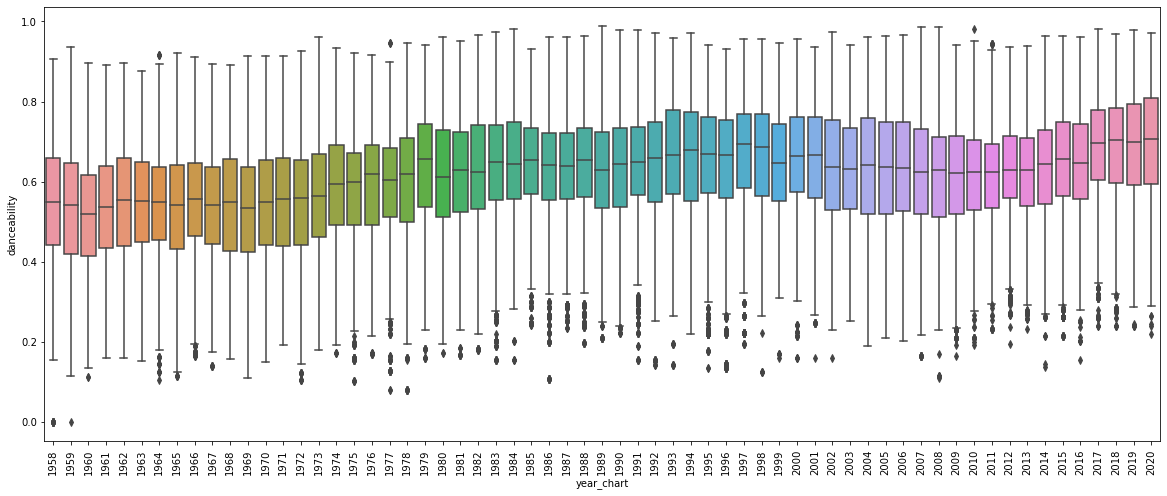

In [280]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="danceability",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Como se puede observar, la bailabilidad en los hits ha aumentado un poco desde el año 1958. Observamos un ligero aumento de de esta caracteristica.

### Energia (*energy*)

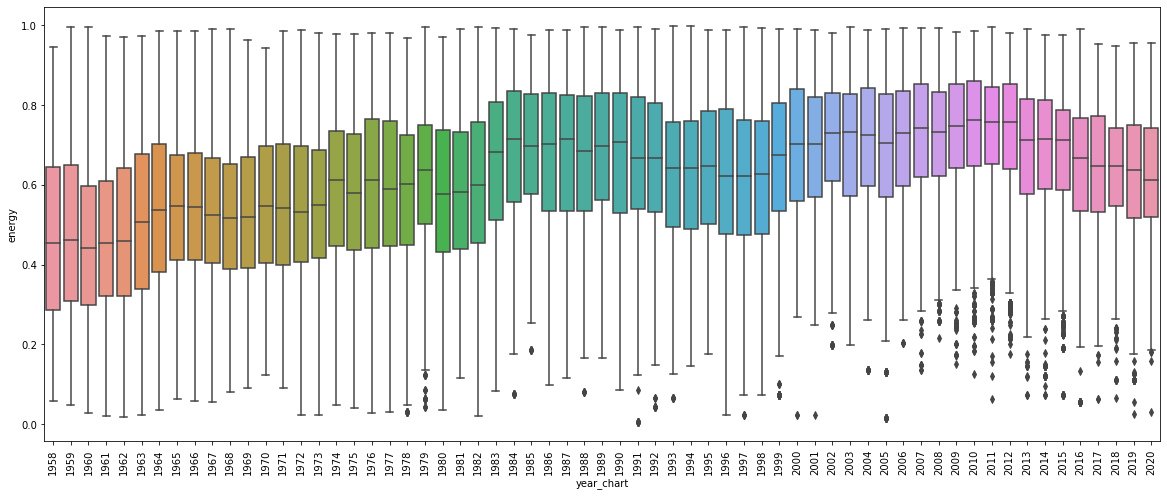

In [281]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart  = sns.boxplot(x="year_chart",y="energy",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Clave musical (*key*)

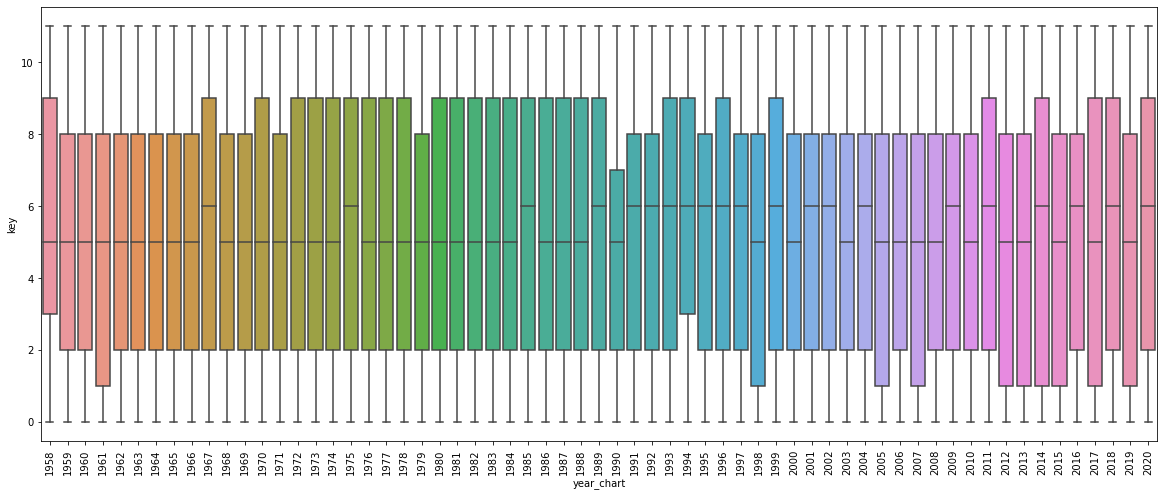

In [282]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="key",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Volumen (*loudness*)

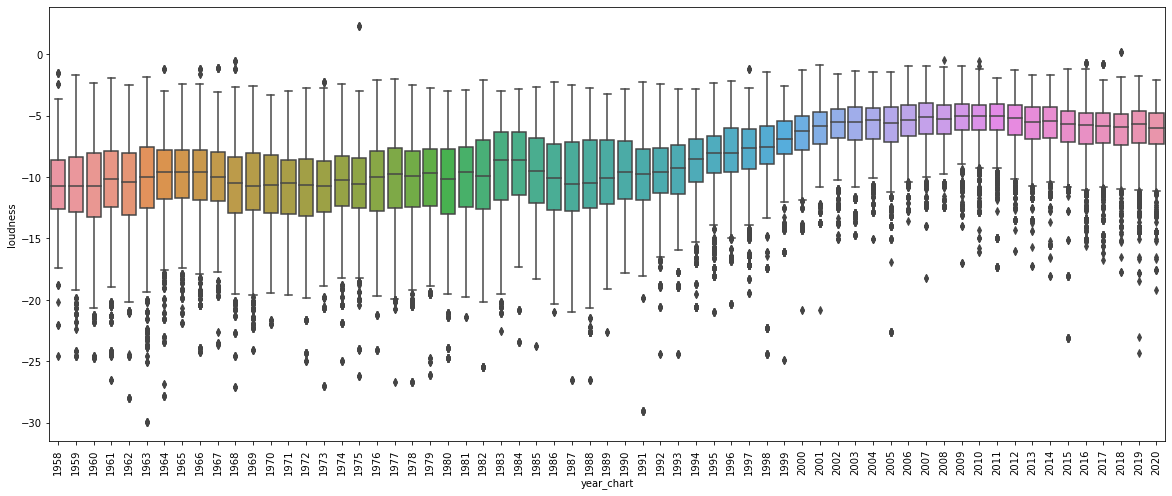

In [283]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="loudness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Habla (*speechiness*)

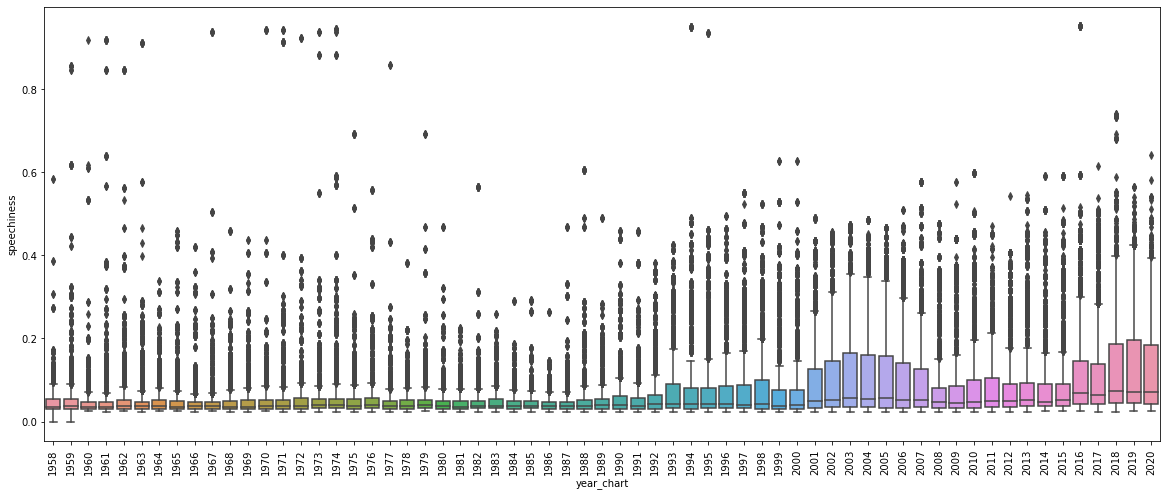

In [284]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="speechiness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Acoustica musical (*acousticness*)

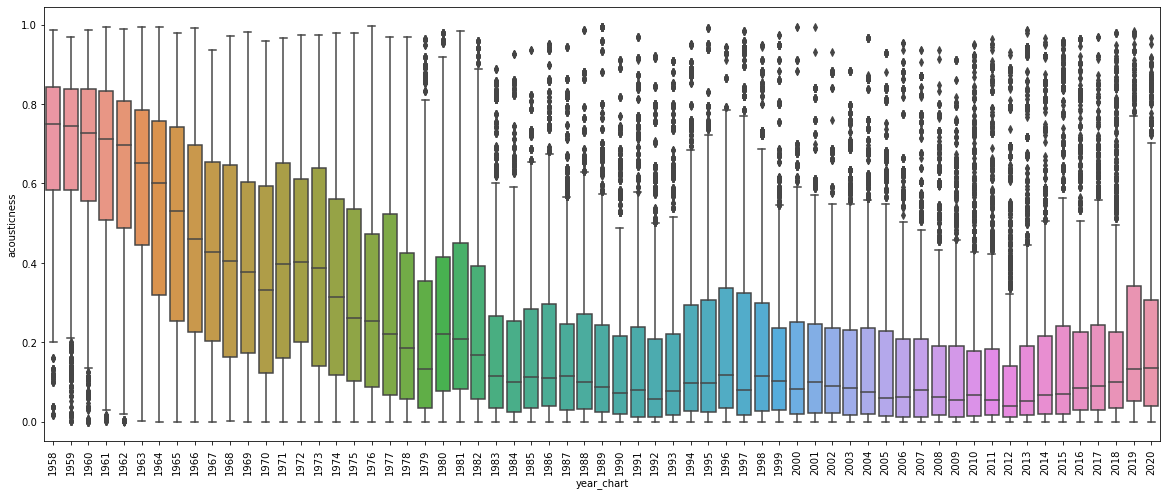

In [285]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="acousticness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Instrumentalidad (*instrumentalness*) 

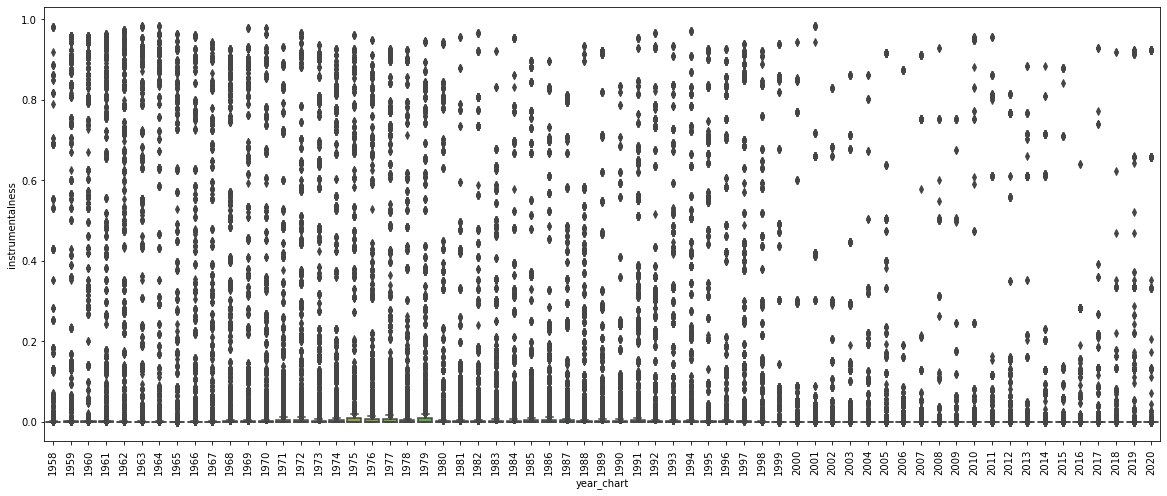

In [286]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="instrumentalness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Vivacidad (*liveness*) 

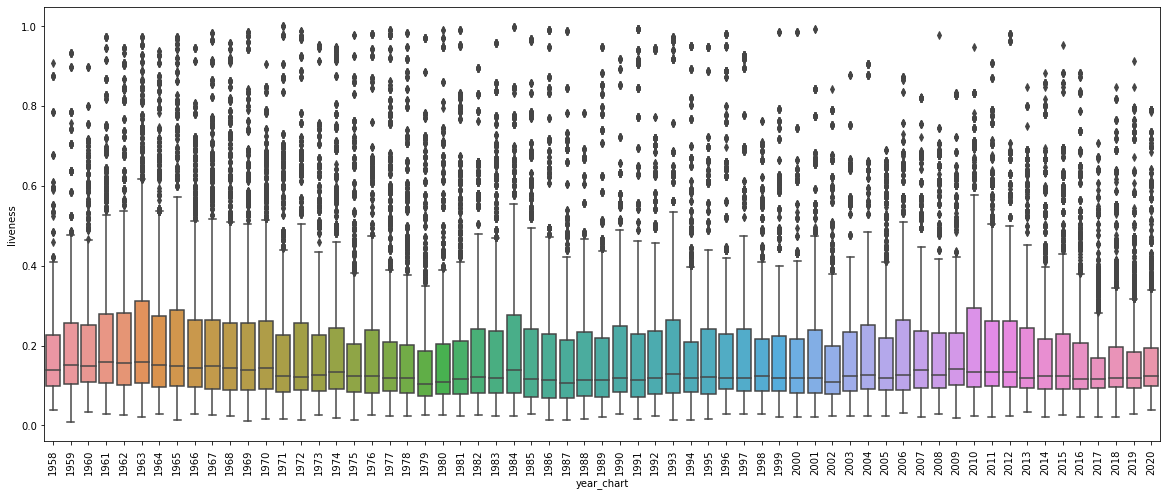

In [287]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart = sns.boxplot(x="year_chart",y="liveness",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Valencia (*valence*)

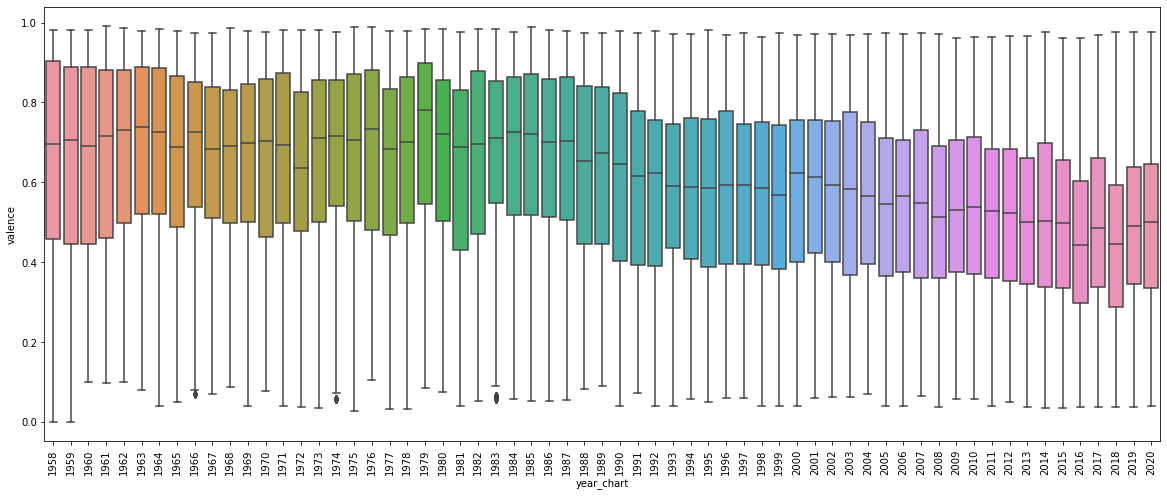

In [288]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart  = sns.boxplot(x="year_chart",y="valence",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Tempo (*tempo*)

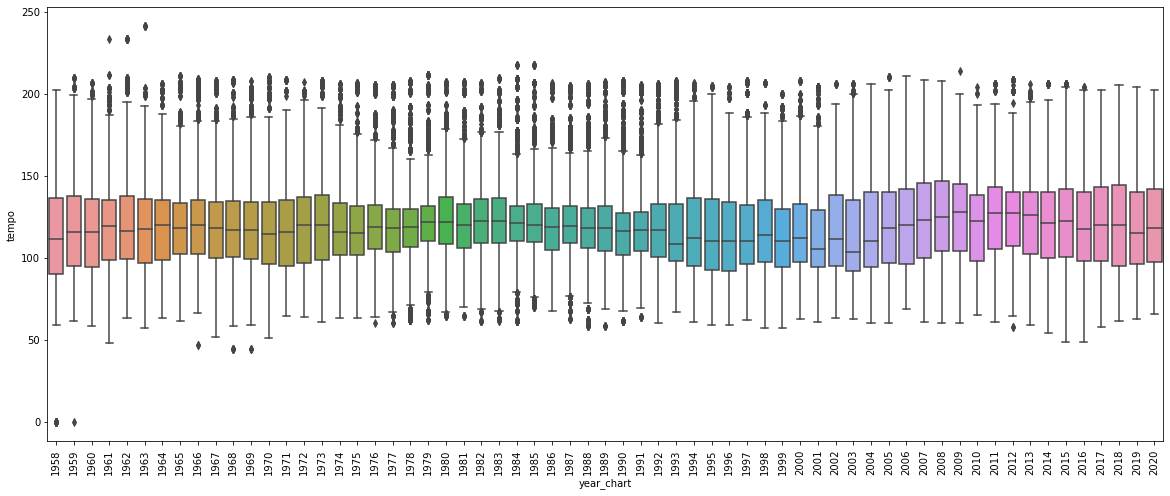

In [289]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
chart  = sns.boxplot(x="year_chart",y="tempo",data = df_hits);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## boxplot por meses
    - Para cada caracteristica graficamos un boxplox por meses de los ultimos 20 años, para ver si existen variaciones significativas, segun meses.

### Bailabilidad (*danceability*)

In [290]:
df_hits['date_chart'] = pd.to_datetime(df_hits['date_chart'])

In [291]:
df_hits.insert(4, 'mon_chart', df_hits['date_chart'].dt.strftime('%b'))

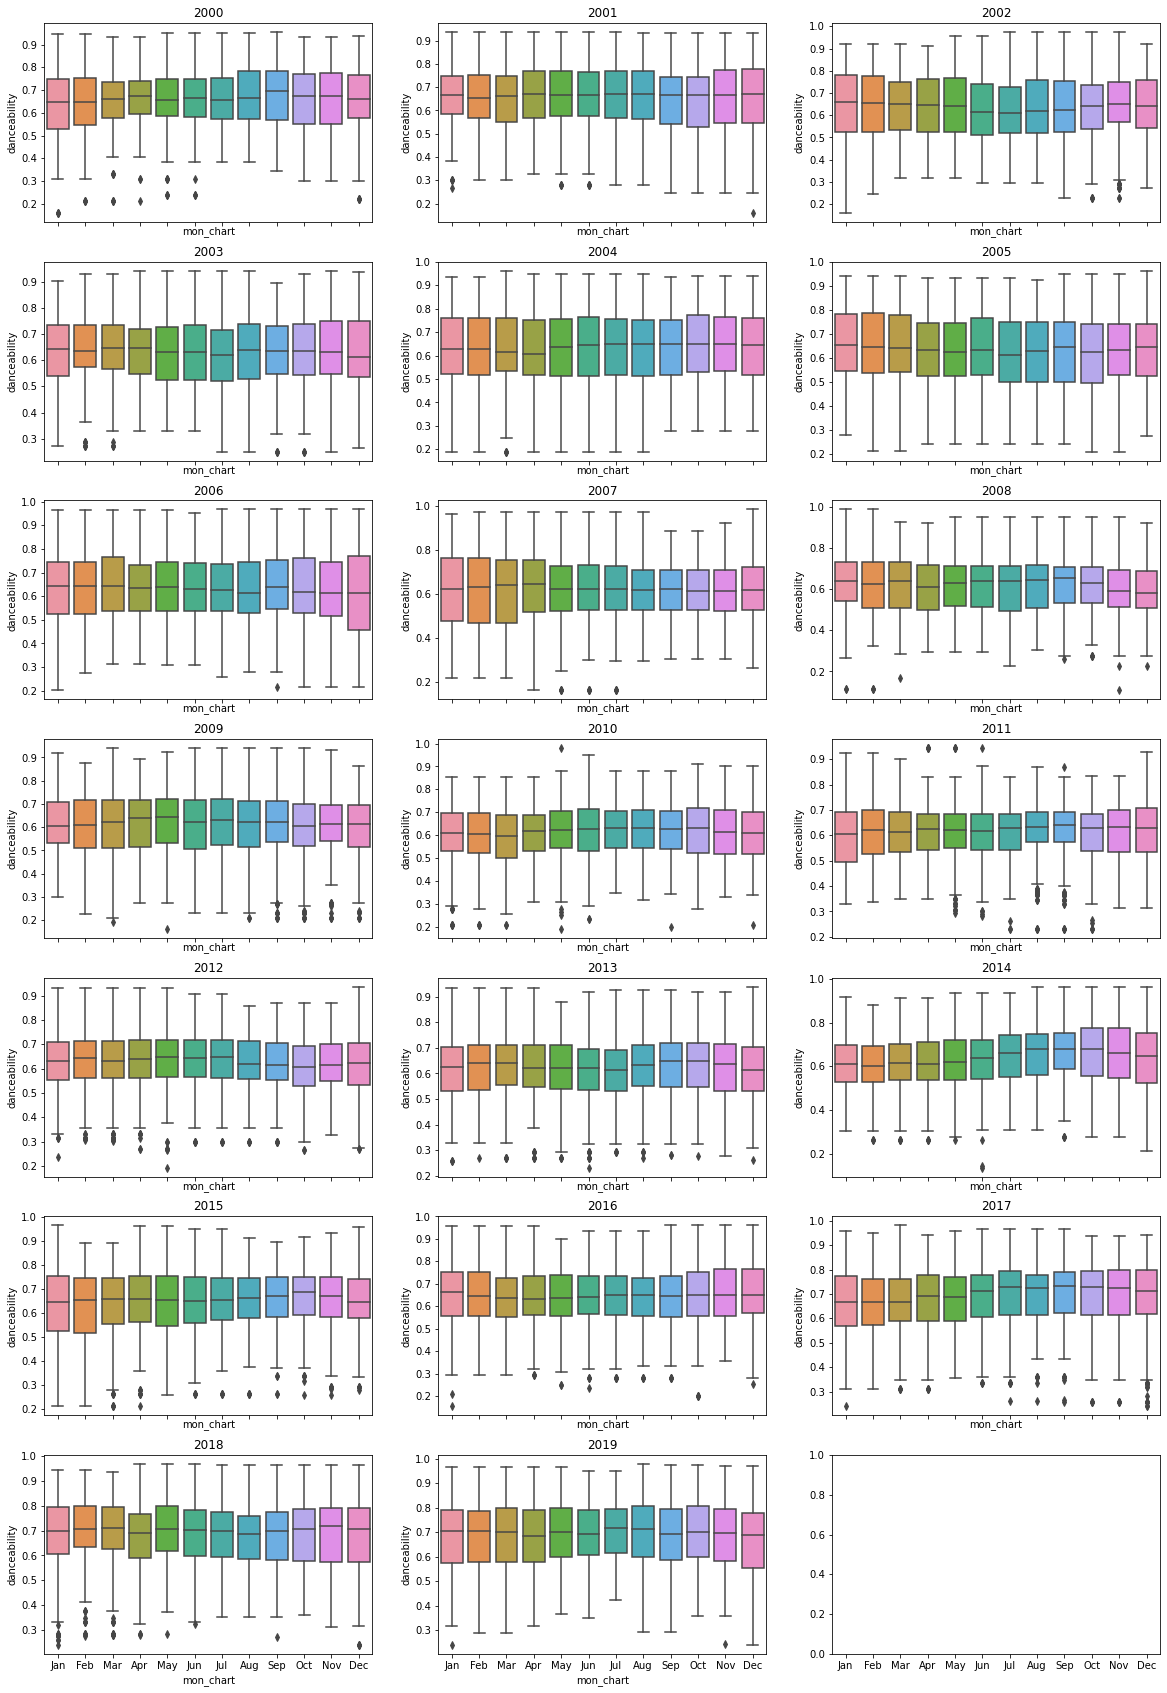

In [292]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="danceability",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Energia (*energy*)

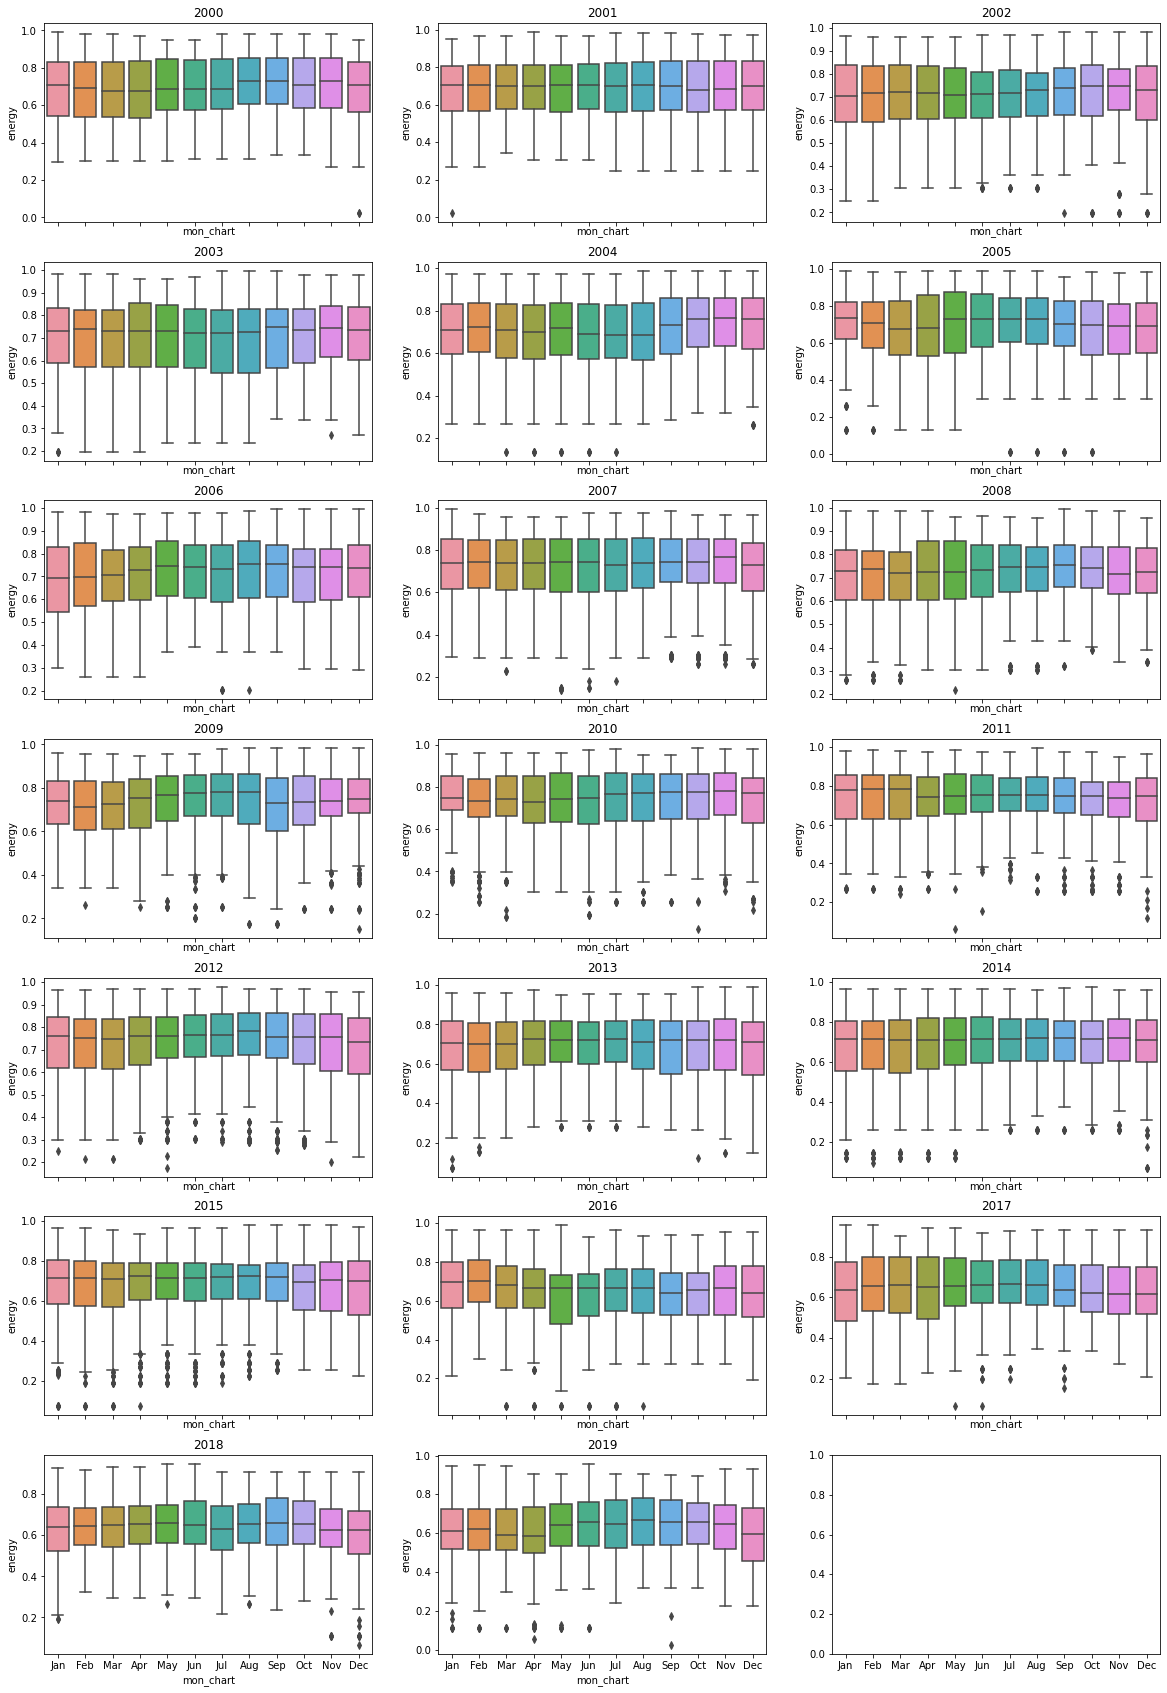

In [293]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="energy",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Clave musical (*key*)

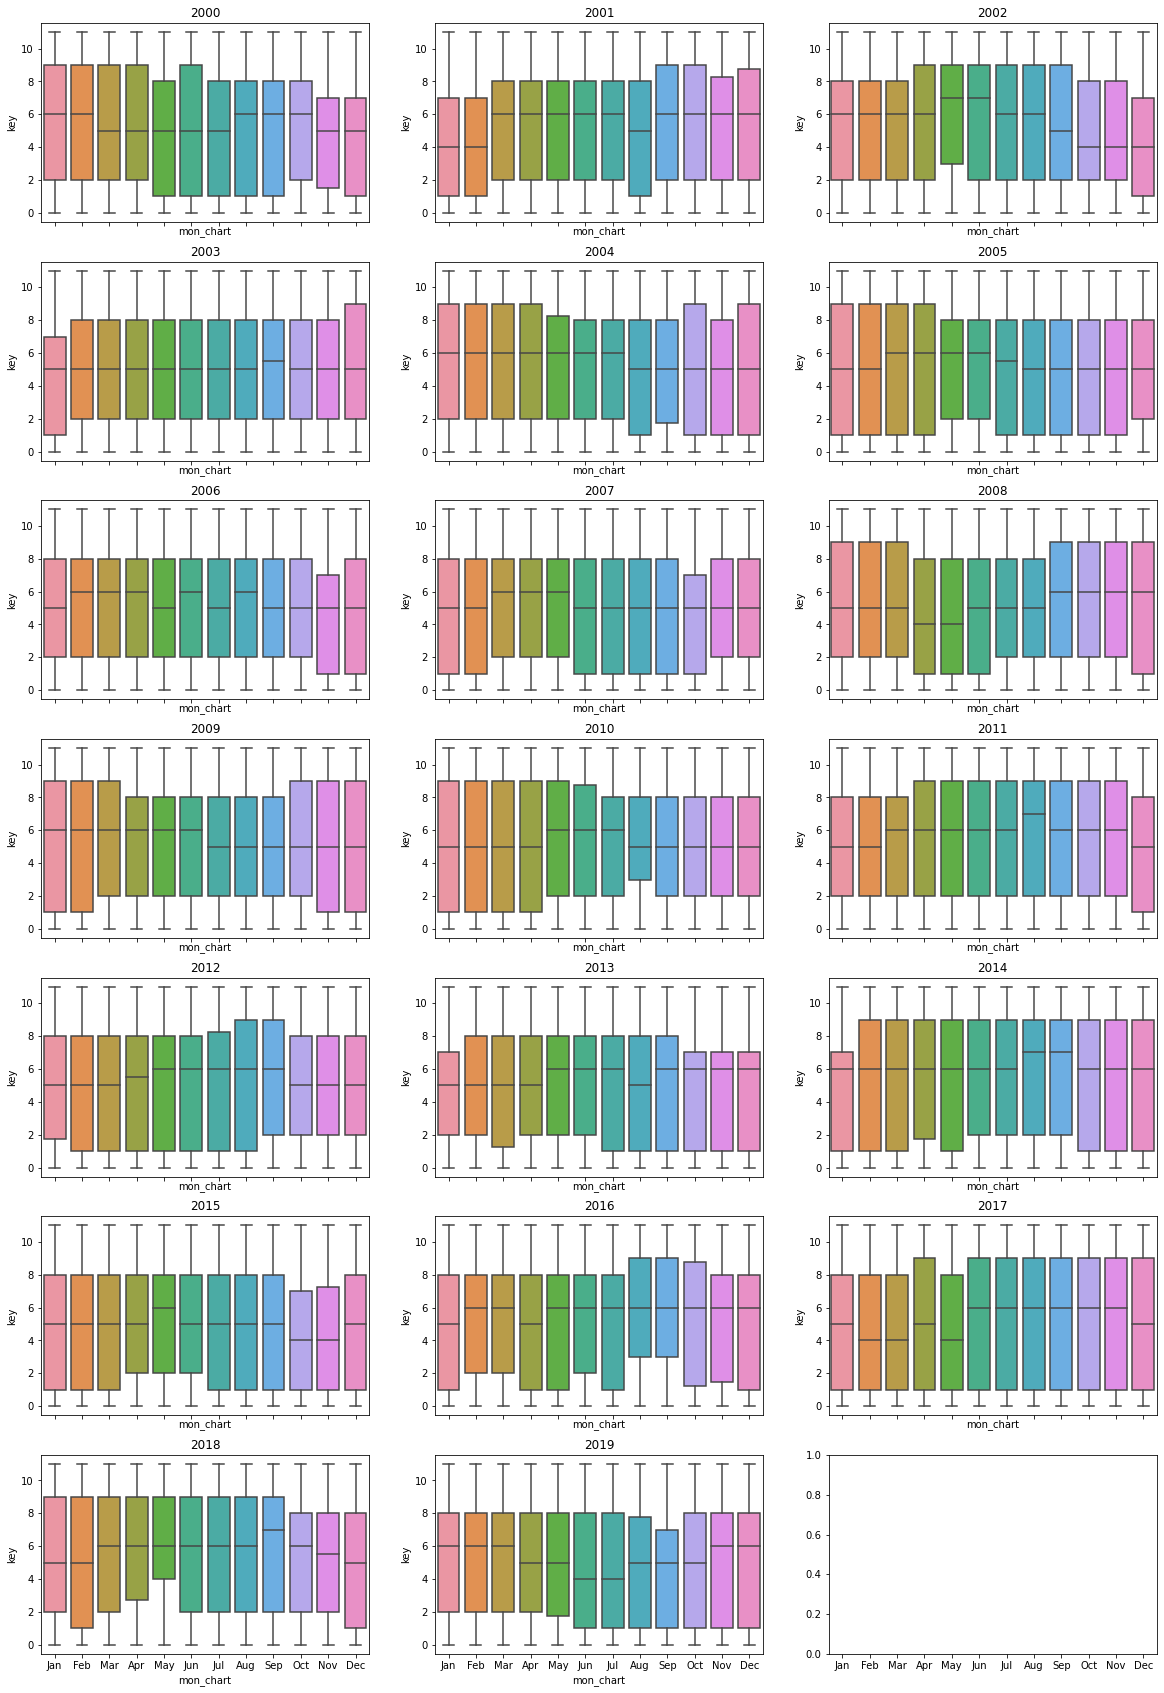

In [294]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="key",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Volumen (*loudness*)

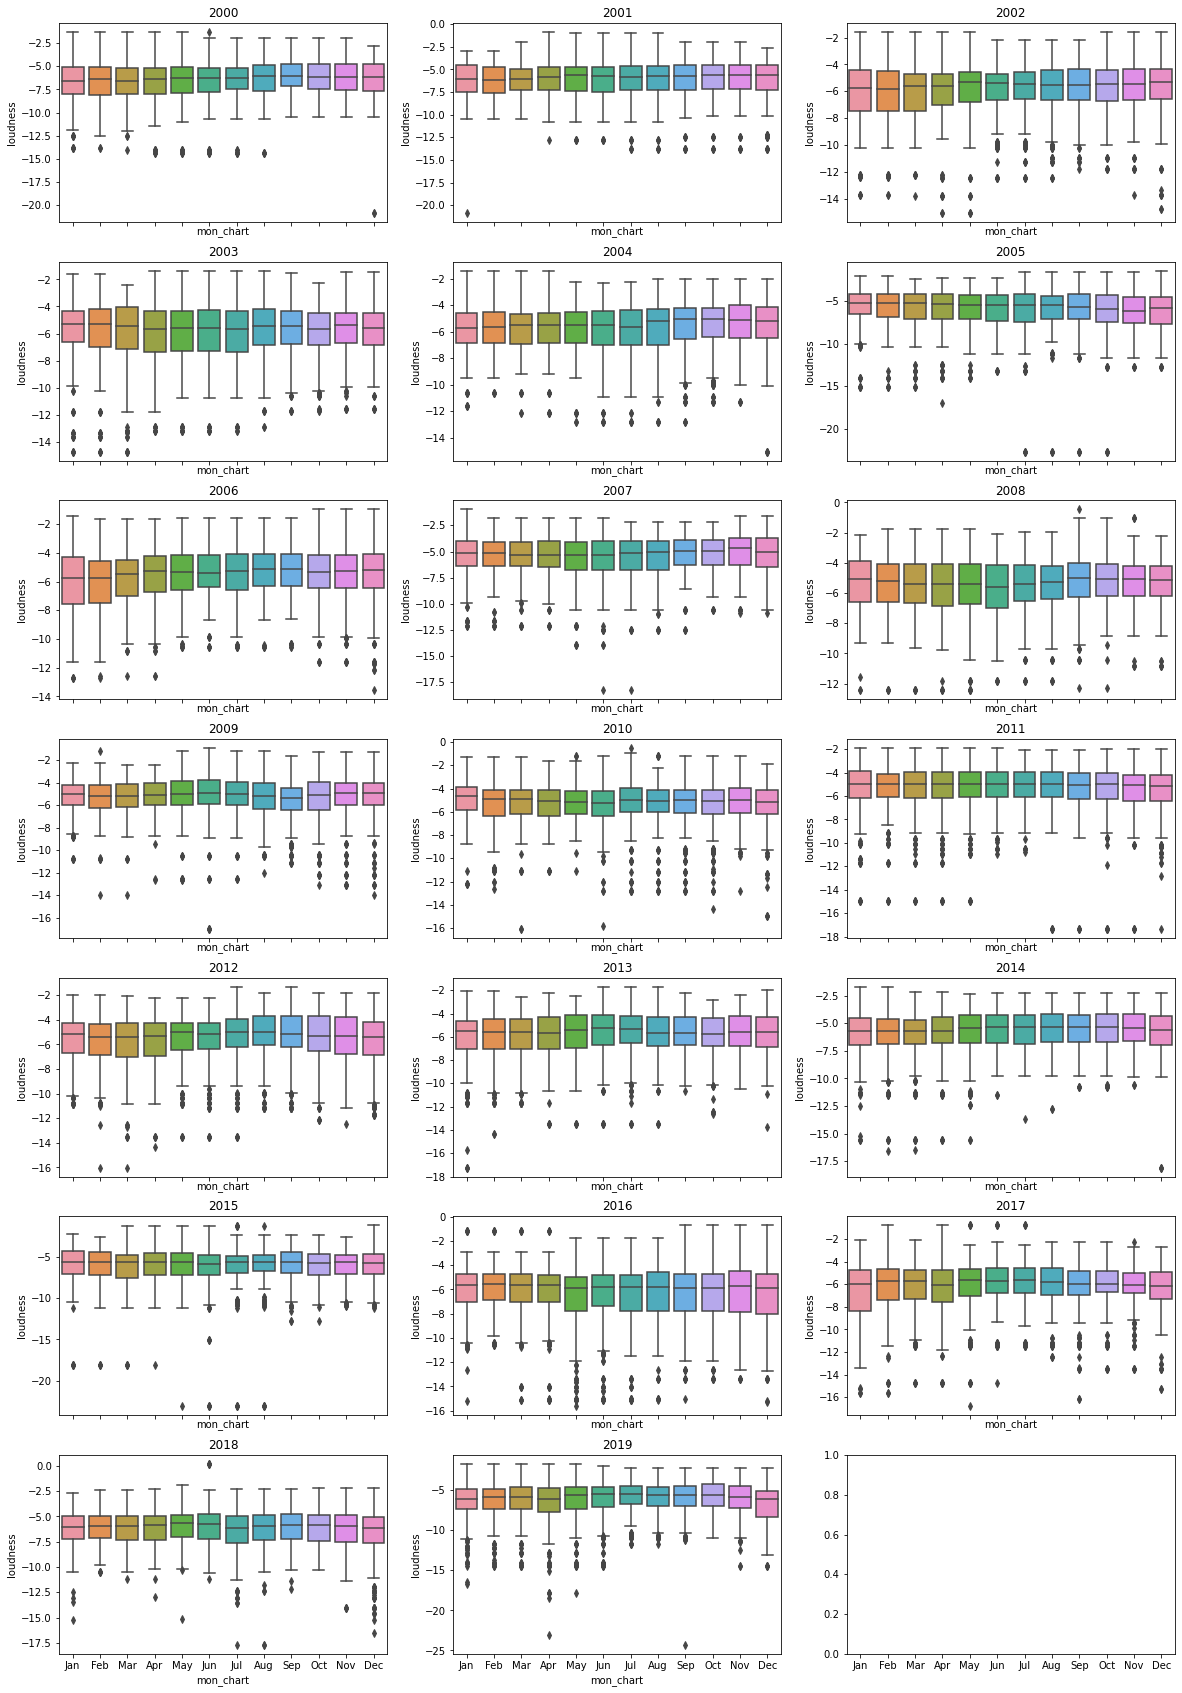

In [295]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="loudness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Habla (*speechiness*)

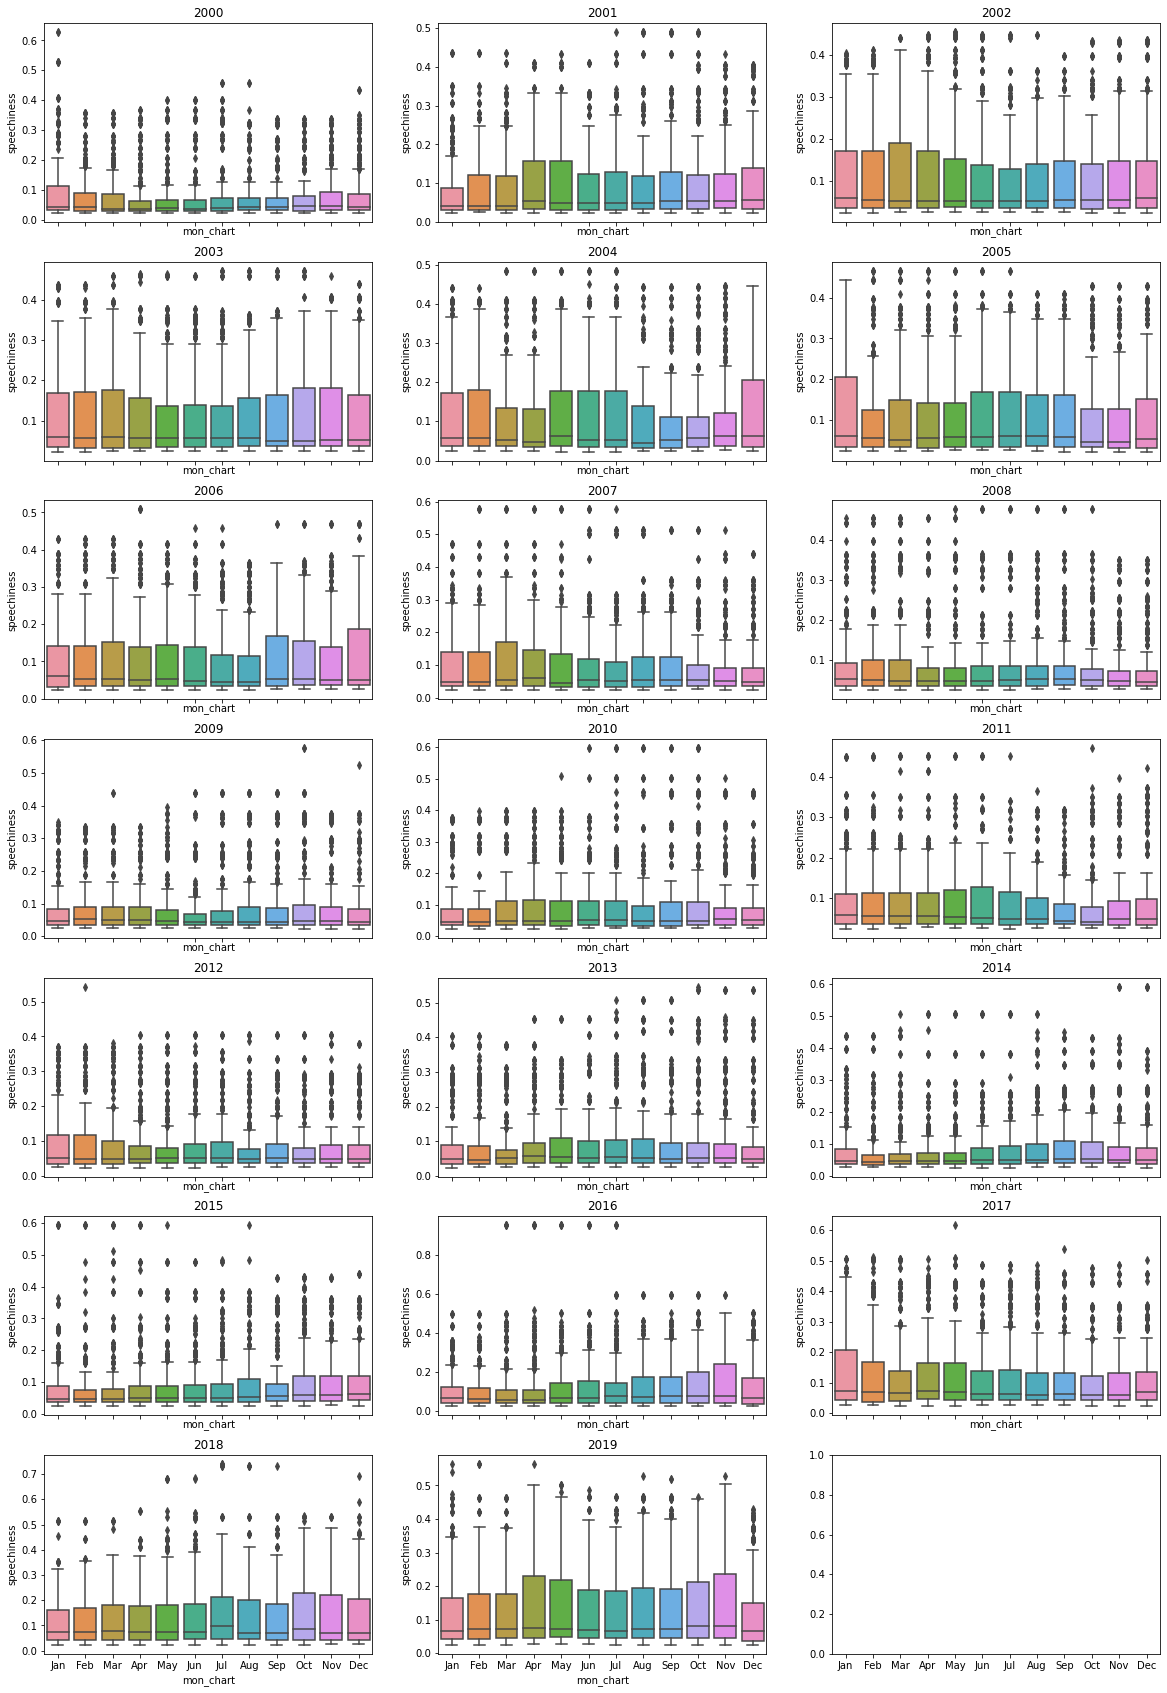

In [296]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="speechiness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Acoustica musical (*acousticness*)

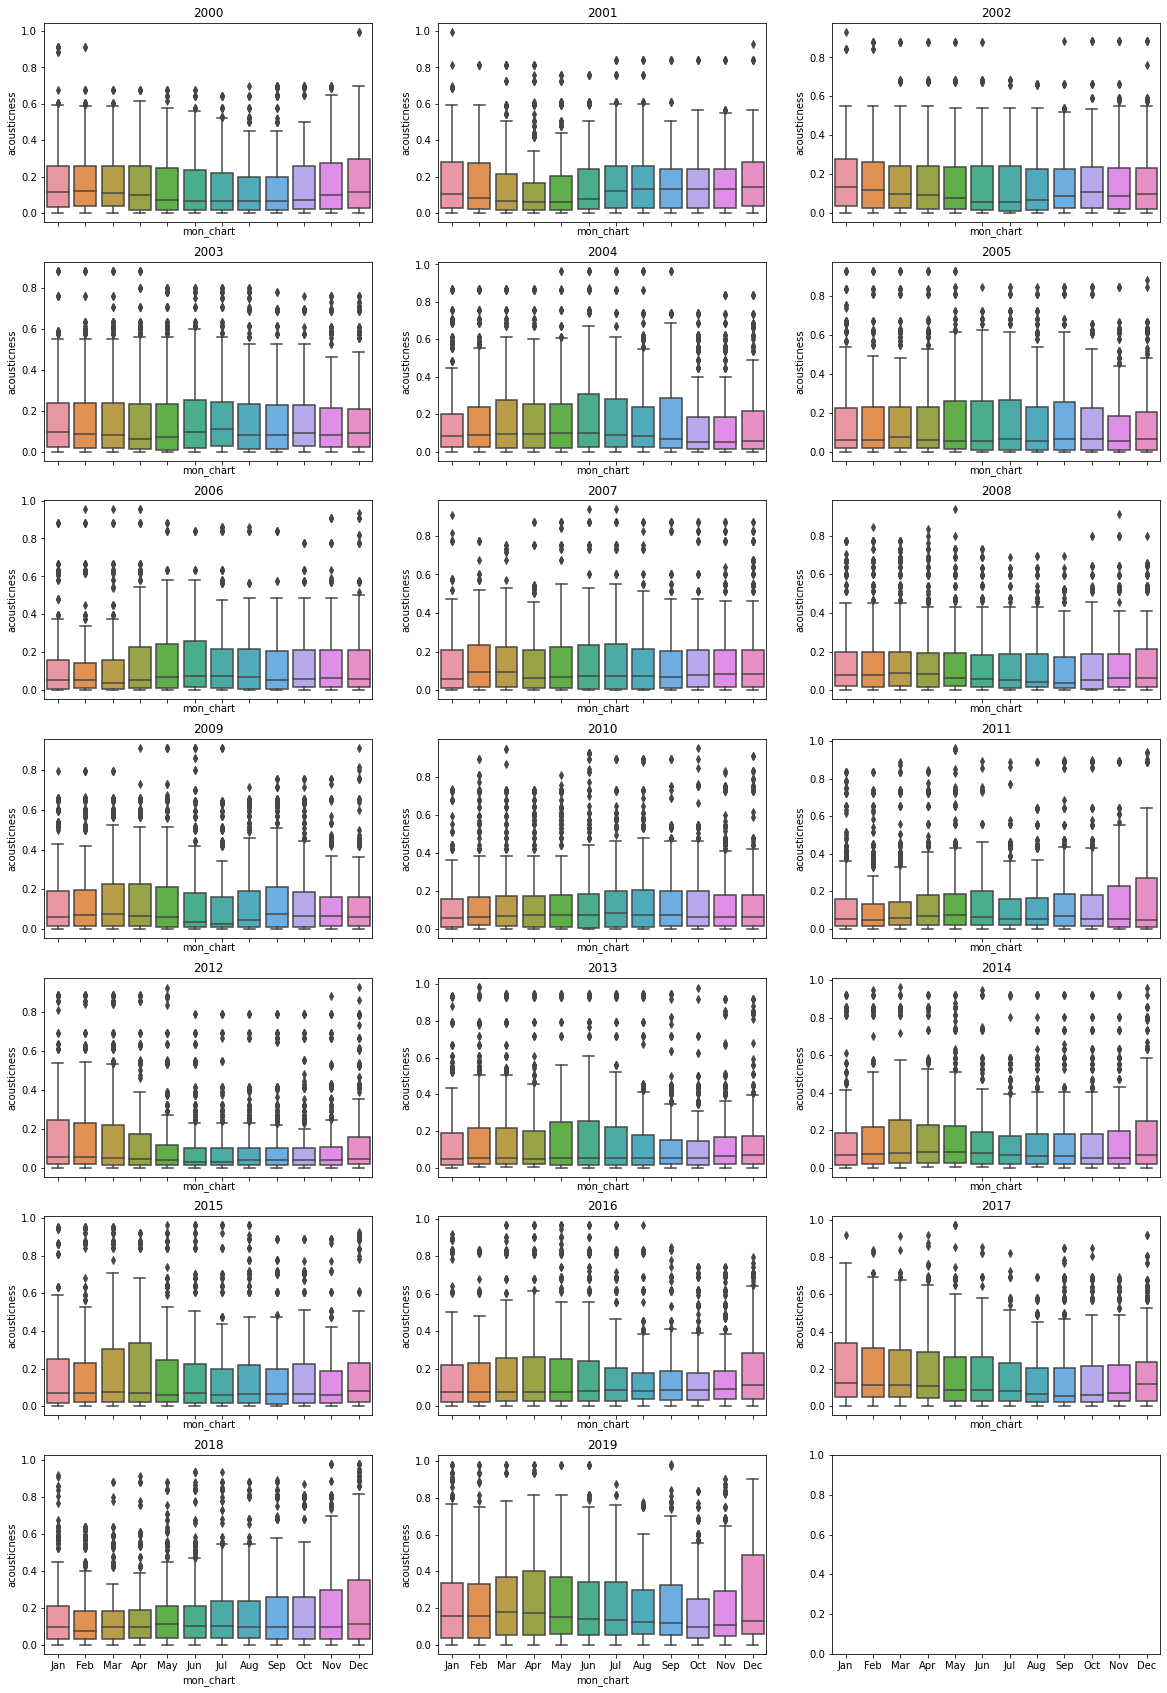

In [297]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="acousticness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Instrumentalidad (*instrumentalness*) 

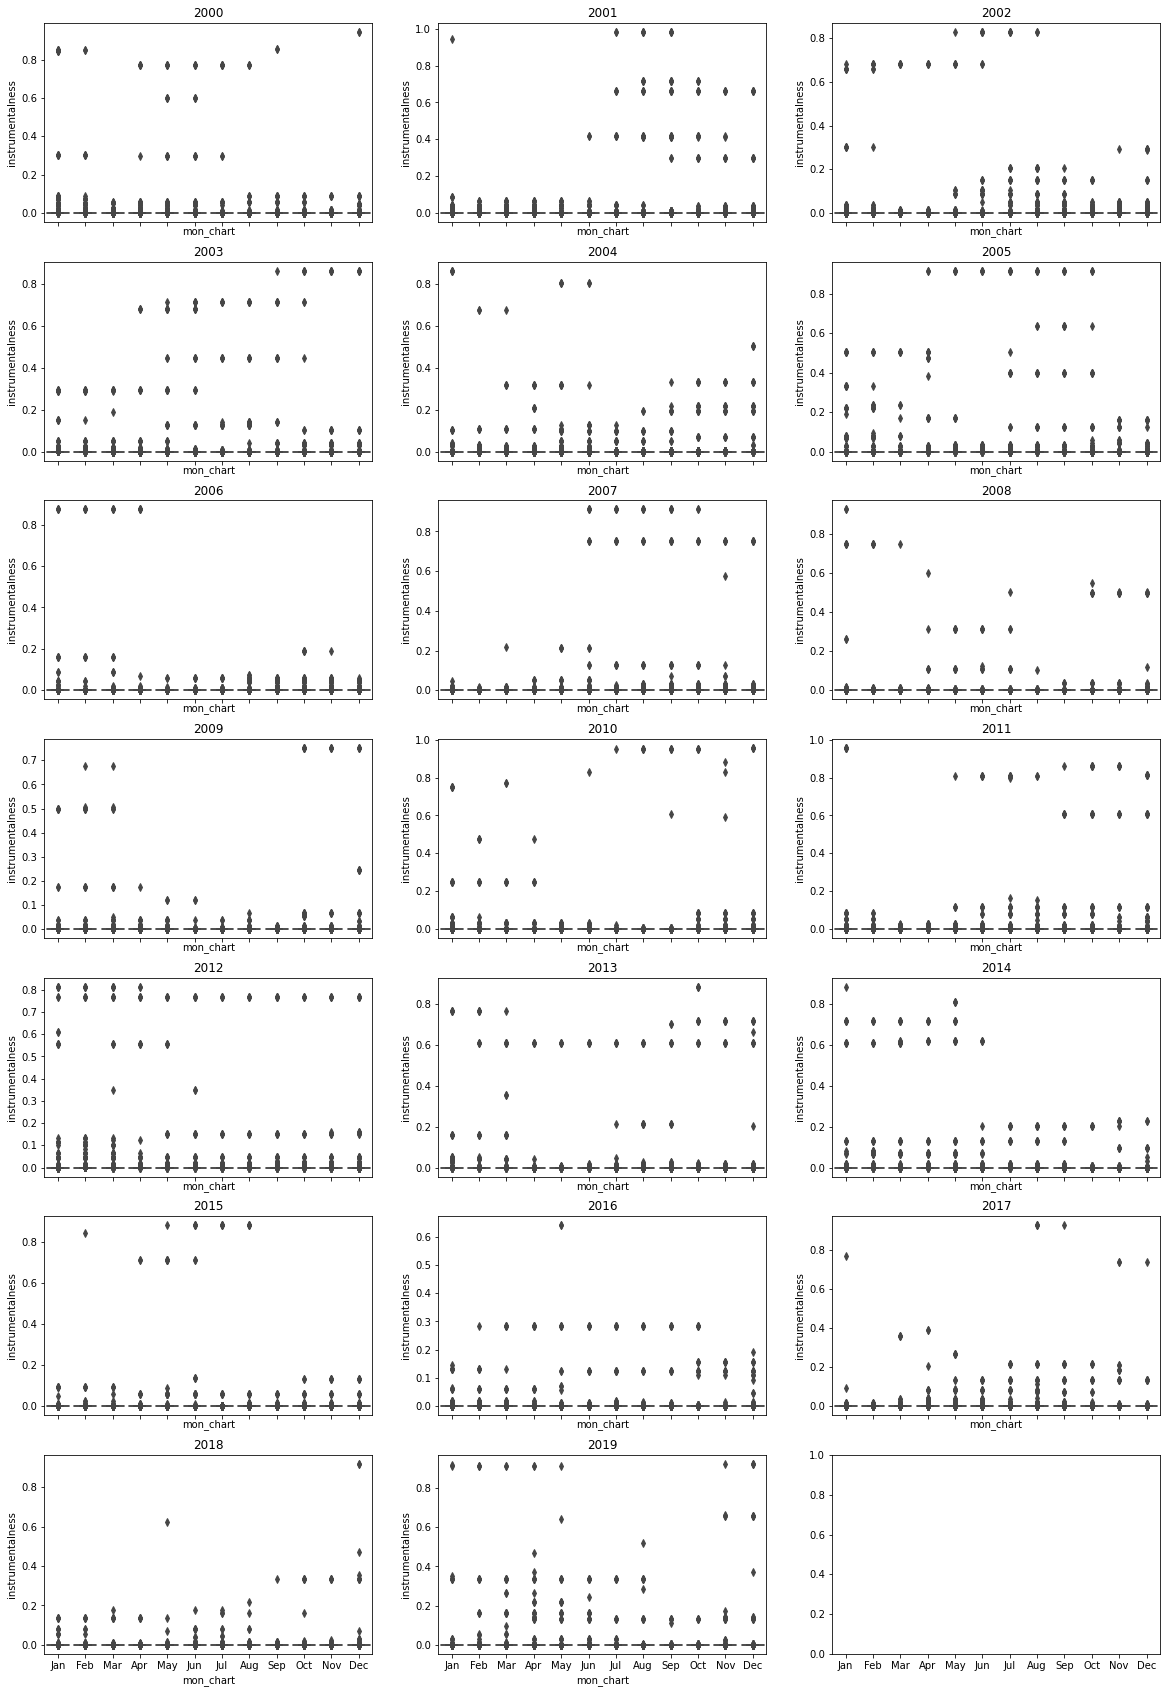

In [298]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="instrumentalness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Vivacidad (*liveness*) 

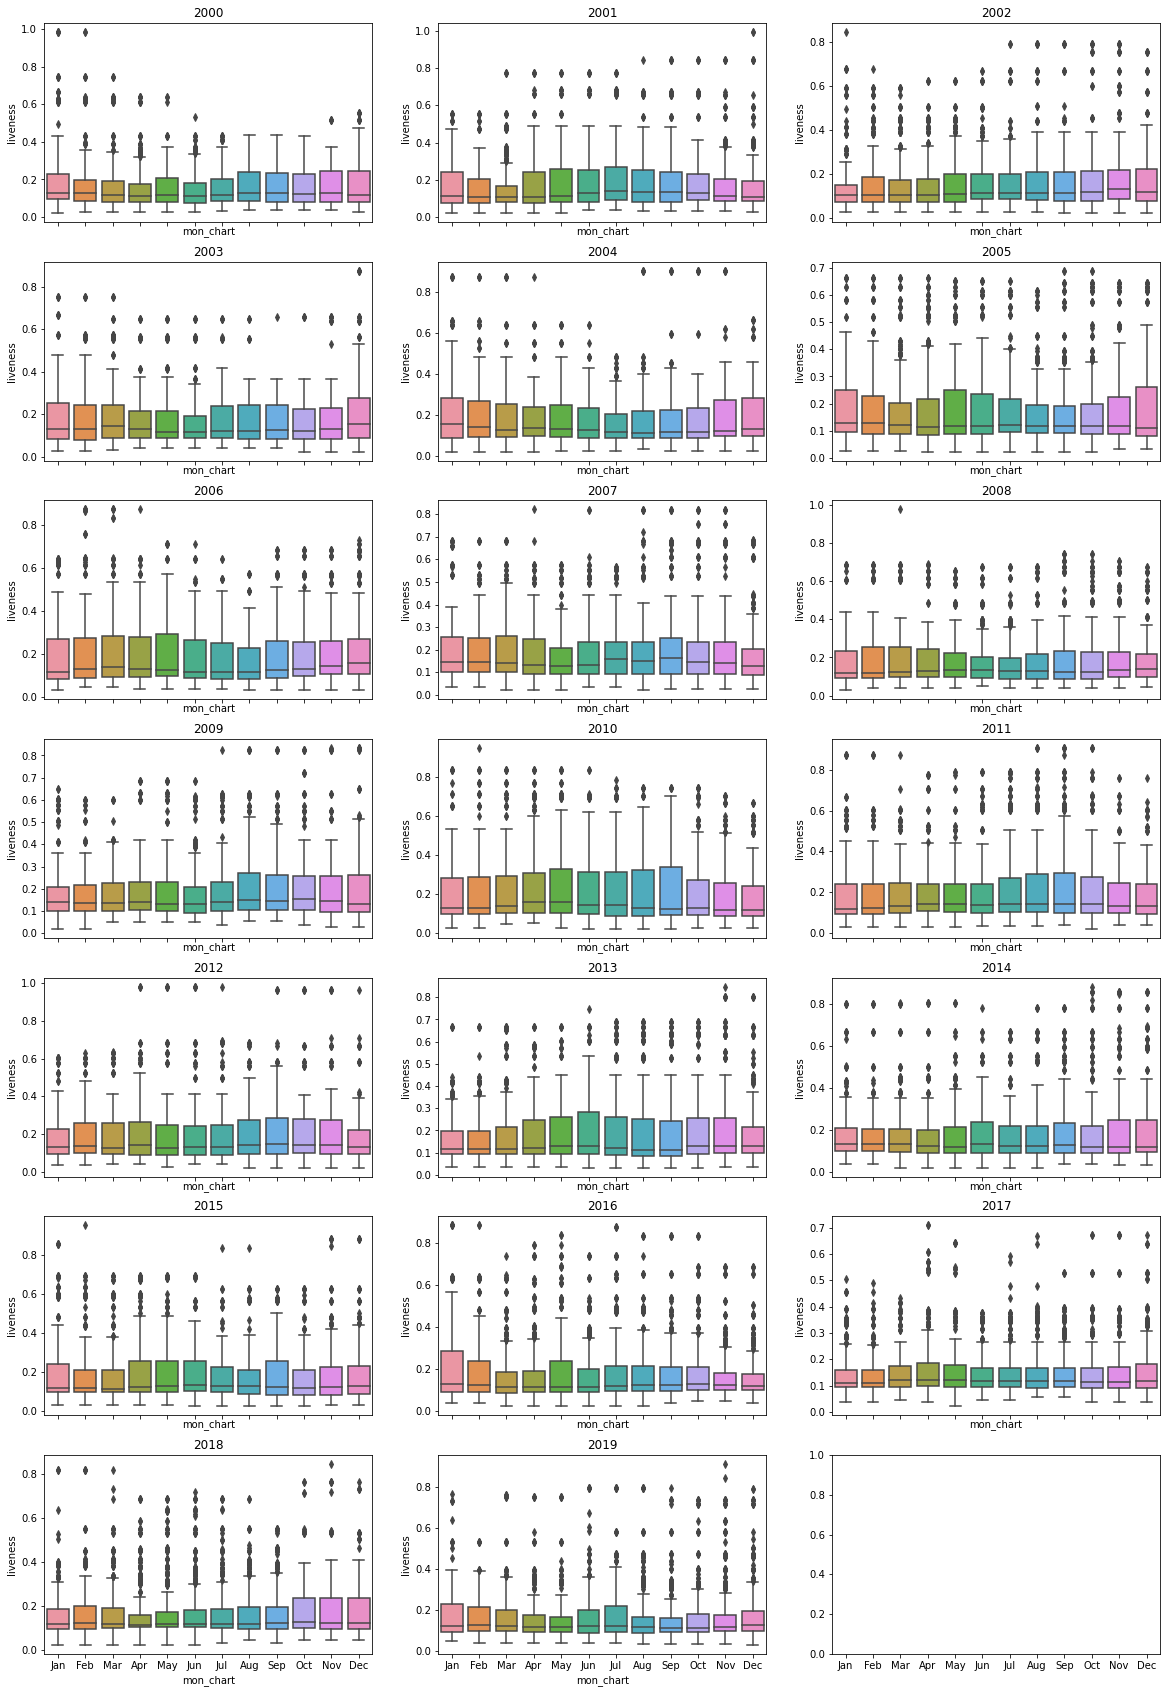

In [299]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="liveness",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Valencia (*valence*)

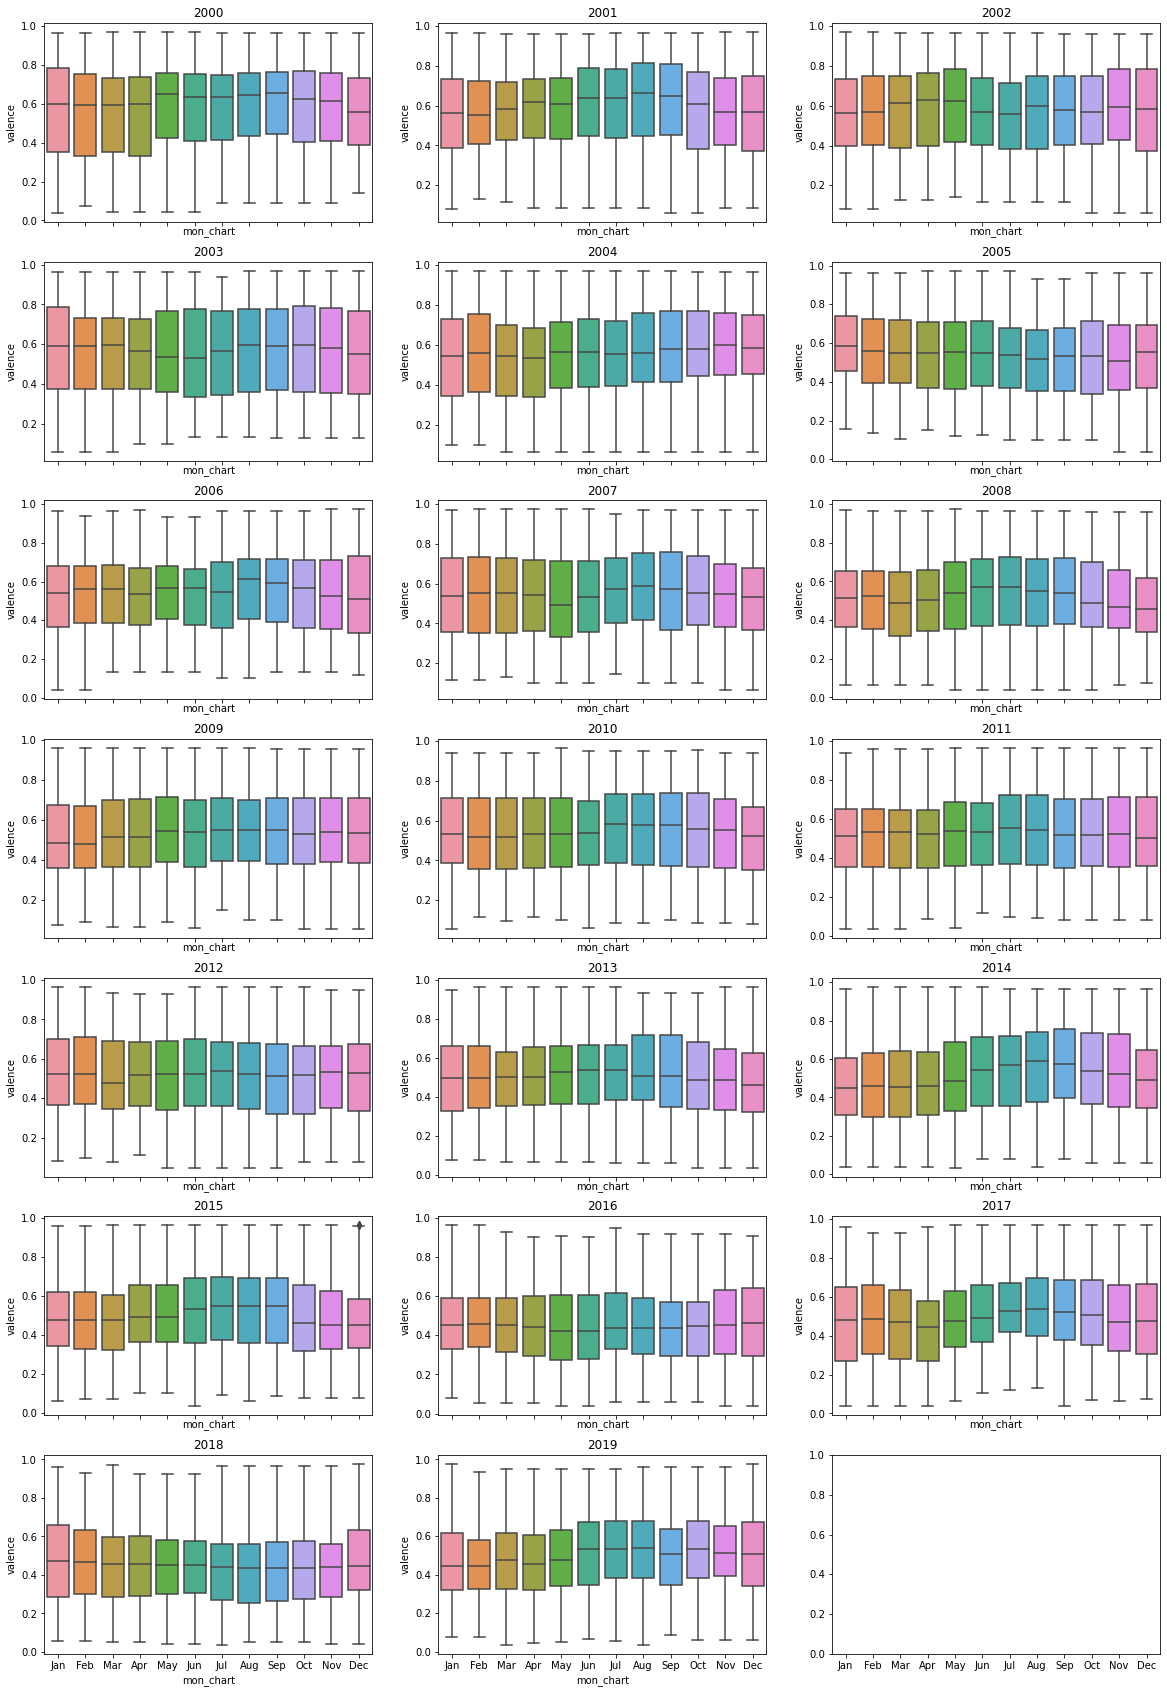

In [300]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="valence",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

### Tempo (*tempo*)

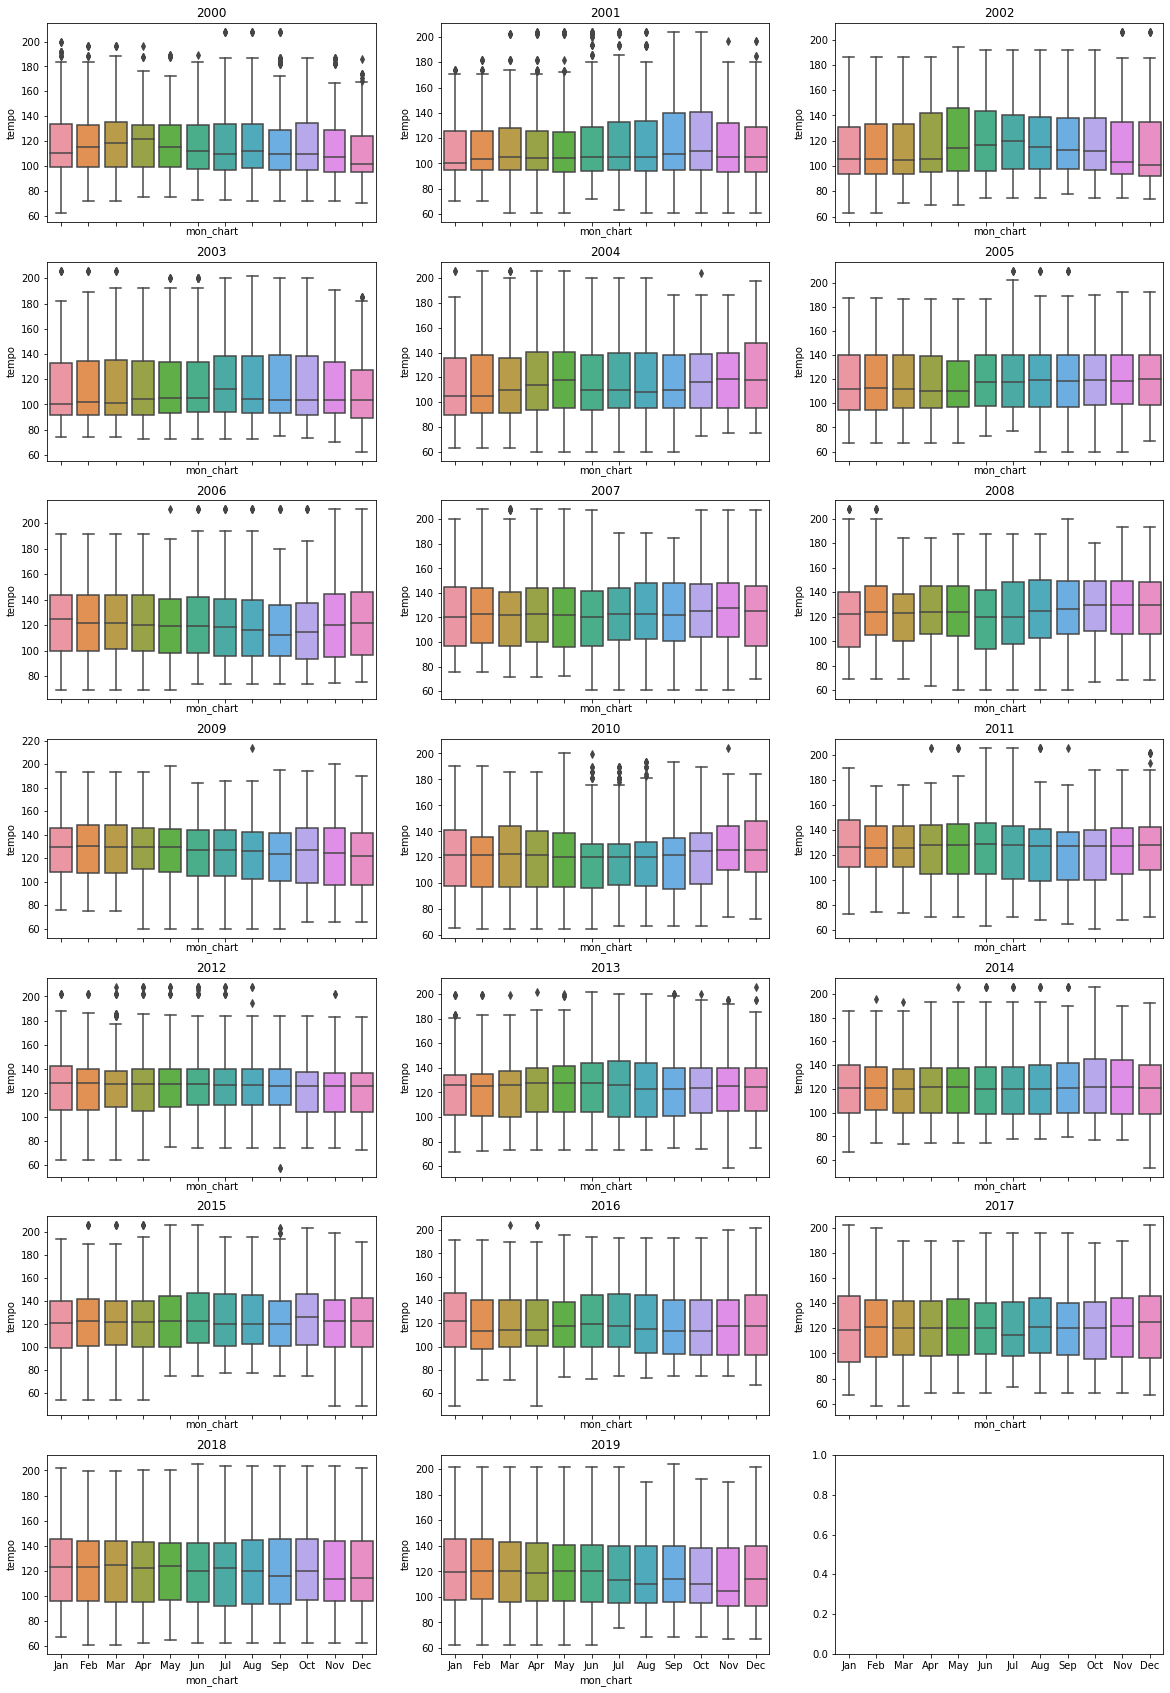

In [301]:
f, axes = plt.subplots(7, 3, figsize=(20, 30), sharex=True)
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2000],ax=axes[0, 0]).set_title('2000');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2001],ax=axes[0, 1]).set_title('2001');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2002],ax=axes[0, 2]).set_title('2002');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2003],ax=axes[1, 0]).set_title('2003');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2004],ax=axes[1, 1]).set_title('2004');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2005],ax=axes[1, 2]).set_title('2005');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2006],ax=axes[2, 0]).set_title('2006');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2007],ax=axes[2, 1]).set_title('2007');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2008],ax=axes[2, 2]).set_title('2008');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2009],ax=axes[3, 0]).set_title('2009');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2010],ax=axes[3, 1]).set_title('2010');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2011],ax=axes[3, 2]).set_title('2011');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2012],ax=axes[4, 0]).set_title('2012');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2013],ax=axes[4, 1]).set_title('2013');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2014],ax=axes[4, 2]).set_title('2014');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2015],ax=axes[5, 0]).set_title('2015');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2016],ax=axes[5, 1]).set_title('2016');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2017],ax=axes[5, 2]).set_title('2017');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2018],ax=axes[6, 0]).set_title('2018');
sns.boxplot(x="mon_chart",y="tempo",data = df_hits [df_hits["year_chart"]==2019],ax=axes[6, 1]).set_title('2019');

## Matriz de correlación
   - Graficamos matriz de correlacion para ver si existe relación entre caracteristicas

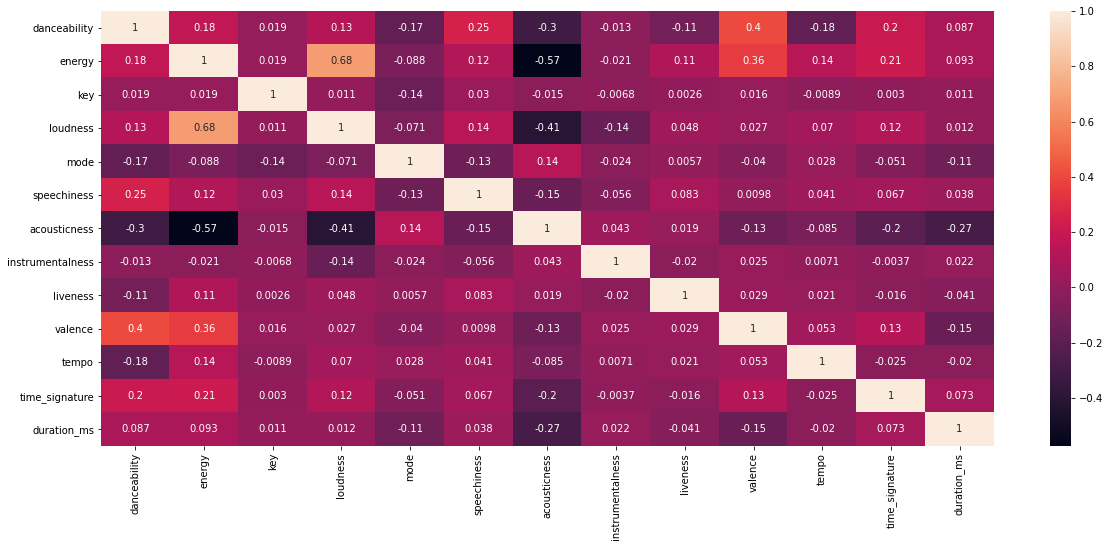

In [302]:
dims = (12, 8)
fig = plt.figure(figsize=a_dims)
sns.heatmap(df_hits.loc[:,"danceability":"duration_ms"].corr(), annot = True);

## Top 10 artistas con mas hits
 - A continuación se monstaran lo 10 artistas con mas hits a lo largo de la historia

In [303]:
print (df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"])

artist
Glee Cast          202
Drake              146
Taylor Swift       107
Eminem              71
Lil Wayne           67
Future              65
Kanye West          63
Justin Bieber       62
The Beatles         62
Aretha Franklin     62
Name: title, dtype: int64


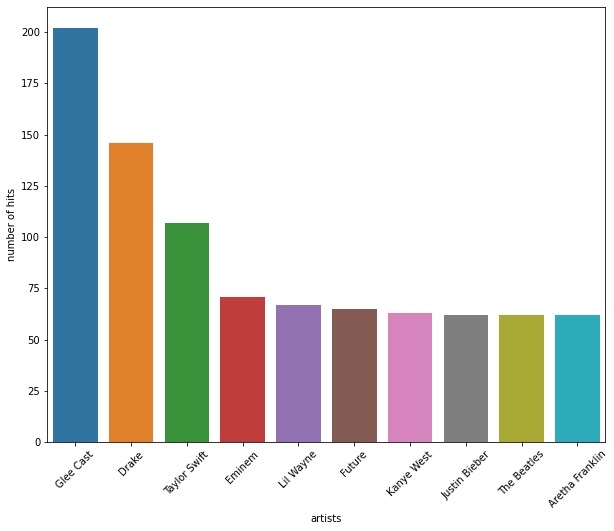

In [304]:
artists_bar_data = df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"]
chart = sns.barplot(artists_bar_data.index, artists_bar_data.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='artists', ylabel='number of hits');

Para cada uno de los artistas vamos a ver su evolucion de hits en el tiempo

In [305]:
df_top_artists = df_hits_uniq.groupby(["artist","year_chart"])\
.count().sort_values('title',ascending=False).iloc[:]["title"].reset_index()
df_top_artists = df_top_artists.rename(columns={"title":"count"})
df_top_artists = df_top_artists.astype({"count": float})

In [306]:
df_Glee = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[0])]
df_Drake = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[1])]
df_Taylor = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[2])]
df_Eminem = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[3])]
df_Wayne = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[4])]
df_Future = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[5])]
df_Kanye = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[6])]
df_Bieber = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[7])]
df_Franklin = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[8])]
df_Beatles = df_top_artists[(df_top_artists["artist"] == artists_bar_data.index[9])]

In [307]:
min_year_glee = df_Glee.iloc[:]["year_chart"].min()
max_year_glee = df_Glee.iloc[:]["year_chart"].max()
df_Glee = df_Glee.copy()
for i in range(min_year_glee,max_year_glee):
    if df_Glee[df_Glee["year_chart"]==i].any().any() == False:
        df_Glee.loc[-1]= [df_Glee.iloc[0]["artist"],i,0]

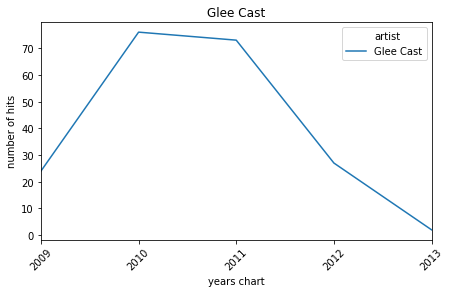

In [308]:
dims = (7, 4)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_glee,max_year_glee)
ax.set_xticks(range(min_year_glee,max_year_glee+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Glee);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[0])
plt.setp(chart.get_xticklabels(),rotation=45);

In [309]:
min_year_drake = df_Drake.iloc[:]["year_chart"].min()
max_year_drake = df_Drake.iloc[:]["year_chart"].max()
df_Drake = df_Drake.copy()
for i in range(min_year_drake,max_year_drake):
    if df_Drake[df_Drake["year_chart"]==i].any().any() == False:
        df_Drake.loc[-1]= [df_Drake.iloc[0]["artist"],i,0]

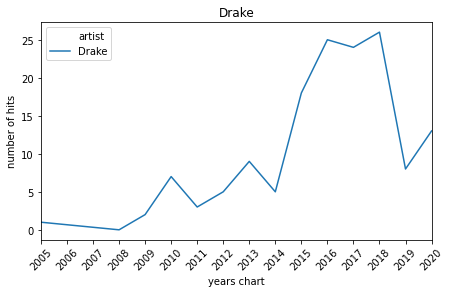

In [310]:
dims = (7, 4)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_drake,max_year_drake)
ax.set_xticks(range(min_year_drake,max_year_drake+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Drake);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[1])
plt.setp(chart.get_xticklabels(),rotation=45);

In [311]:
min_year_taylor = df_Taylor.iloc[:]["year_chart"].min()
max_year_taylor = df_Taylor.iloc[:]["year_chart"].max()
df_Taylor = df_Taylor.copy()
for i in range(min_year_taylor,max_year_taylor):
    if df_Taylor[df_Taylor["year_chart"]==i].any().any() == False:
        df_Taylor.loc[-1]= [df_Taylor.iloc[0]["artist"],i,0]

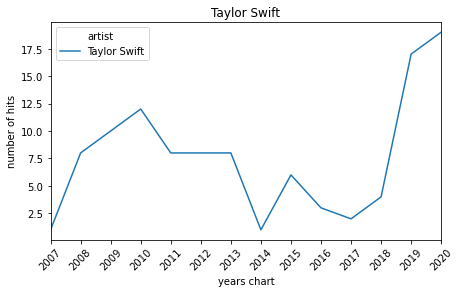

In [312]:
dims = (7, 4)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_taylor,max_year_taylor)
ax.set_xticks(range(min_year_taylor,max_year_taylor+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Taylor);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[2])
plt.setp(chart.get_xticklabels(),rotation=45);

In [313]:
min_year_eminem = df_Eminem.iloc[:]["year_chart"].min()
max_year_eminem = df_Eminem.iloc[:]["year_chart"].max()
df_Eminem = df_Eminem.copy()
for i in range(min_year_eminem,max_year_eminem):
    if df_Eminem[df_Eminem["year_chart"]==i].any().any() == False:
        df_Eminem.loc[-1]= [df_Eminem.iloc[0]["artist"],i,0]

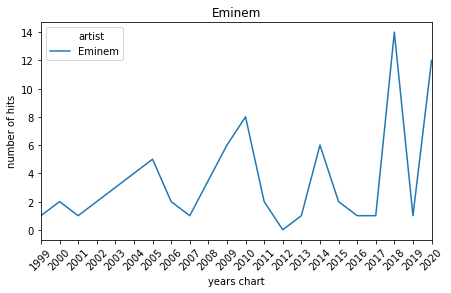

In [314]:
dims = (7, 4)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_eminem,max_year_eminem)
ax.set_xticks(range(min_year_eminem,max_year_eminem+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Eminem);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[3])
plt.setp(chart.get_xticklabels(),rotation=45);

In [315]:
min_year_wayne = df_Wayne.iloc[:]["year_chart"].min()
max_year_wayne = df_Wayne.iloc[:]["year_chart"].max()
df_Wayne = df_Wayne.copy()
for i in range(min_year_wayne,max_year_wayne):
    if df_Wayne[df_Wayne["year_chart"]==i].any().any() == False:
        df_Wayne.loc[-1]= [df_Wayne.iloc[0]["artist"],i,0]

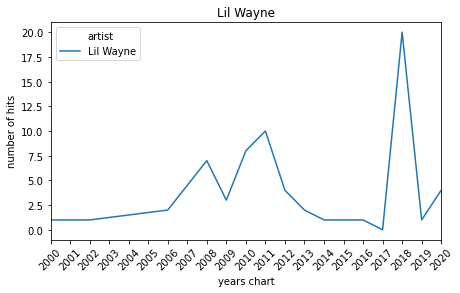

In [316]:
dims = (7, 4)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_wayne,max_year_wayne)
ax.set_xticks(range(min_year_wayne,max_year_wayne+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Wayne);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[4])
plt.setp(chart.get_xticklabels(),rotation=45);

In [317]:
min_year_future = df_Future.iloc[:]["year_chart"].min()
max_year_future  = df_Future.iloc[:]["year_chart"].max()
df_Future = df_Future.copy()
for i in range(min_year_future,max_year_future):
    if df_Future[df_Future["year_chart"]==i].any().any() == False:
        df_Future.loc[-1]= [df_Future.iloc[0]["artist"],i,0]

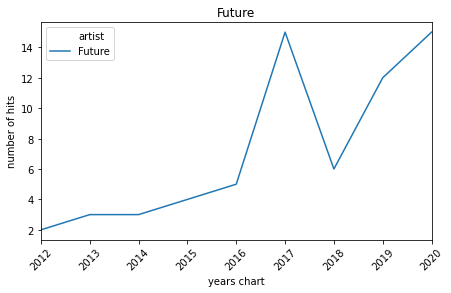

In [318]:
dims = (7, 4)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_future,max_year_future)
ax.set_xticks(range(min_year_future,max_year_future+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Future);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[5])
plt.setp(chart.get_xticklabels(),rotation=45);

In [319]:
min_year_kanye = df_Kanye.iloc[:]["year_chart"].min()
max_year_kanye  = df_Kanye.iloc[:]["year_chart"].max()
df_Kanye = df_Kanye.copy()
for i in range(min_year_kanye,max_year_kanye):
    if df_Kanye[df_Kanye["year_chart"]==i].any().any() == False:
        df_Kanye.loc[-1]= [df_Kanye.iloc[0]["artist"],i,0]

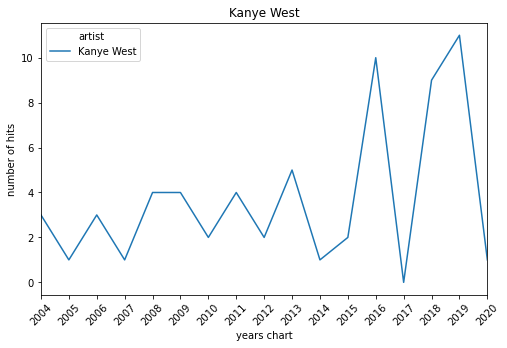

In [320]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_kanye,max_year_kanye)
ax.set_xticks(range(min_year_kanye,max_year_kanye+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Kanye);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[6])
plt.setp(chart.get_xticklabels(),rotation=45);

In [321]:
min_year_bieber = df_Bieber.iloc[:]["year_chart"].min()
max_year_bieber  = df_Bieber.iloc[:]["year_chart"].max()
df_Bieber = df_Bieber.copy()
for i in range(min_year_bieber,max_year_bieber):
    if df_Bieber[df_Bieber["year_chart"]==i].any().any() == False:
        df_Bieber.loc[-1]= [df_Bieber.iloc[0]["artist"],i,0]

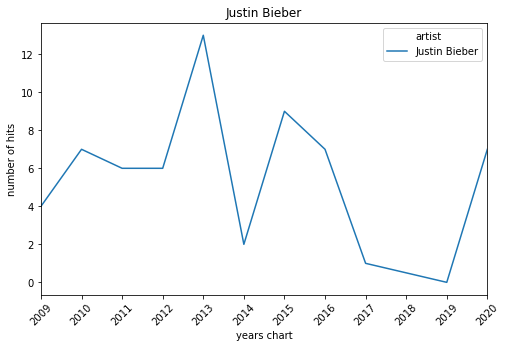

In [322]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_bieber,max_year_bieber)
ax.set_xticks(range(min_year_bieber,max_year_bieber+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Bieber);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[7])
plt.setp(chart.get_xticklabels(),rotation=45);

In [323]:
min_year_franklin = df_Franklin.iloc[:]["year_chart"].min()
max_year_franklin  = df_Franklin.iloc[:]["year_chart"].max()
df_Franklin = df_Franklin.copy()
for i in range(min_year_franklin,max_year_franklin):
    if df_Franklin[df_Franklin["year_chart"]==i].any().any() == False:
        df_Franklin.loc[-1]= [df_Franklin.iloc[0]["artist"],i,0]

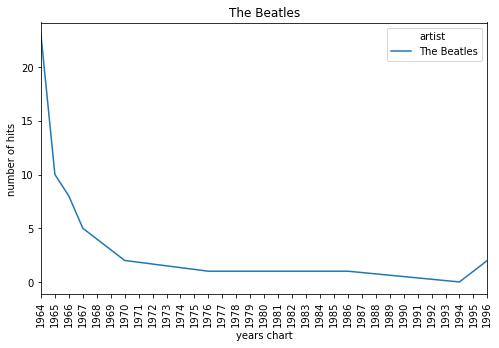

In [324]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_franklin,max_year_franklin)
ax.set_xticks(range(min_year_franklin,max_year_franklin+1))
chart = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Franklin);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[8])
plt.setp(chart.get_xticklabels(),rotation=90);

In [325]:
min_year_beatles = df_Beatles.iloc[:]["year_chart"].min()
max_year_beatles  = df_Beatles.iloc[:]["year_chart"].max()
df_Beatles = df_Beatles.copy()
for i in range(min_year_beatles,max_year_beatles):
    if df_Beatles[df_Beatles["year_chart"]==i].any().any() == False:
        df_Beatles.loc[-1]= [df_Beatles.iloc[0]["artist"],i,0]

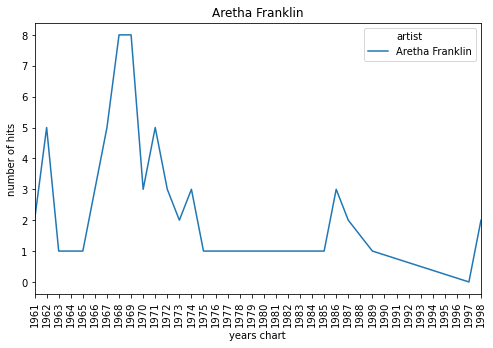

In [326]:
dims = (8, 5)
fig,ax = plt.subplots(figsize=dims)
ax.set_xlim(min_year_beatles,max_year_beatles)
ax.set_xticks(range(min_year_beatles,max_year_beatles+1))
chart  = sns.lineplot(x="year_chart", y="count",hue="artist", data=df_Beatles);
chart.set(xlabel='years chart', ylabel='number of hits')
chart.set_title(artists_bar_data.index[9])
plt.setp(chart.get_xticklabels(),rotation=90);

## Canciones con mas semanas en Hot-100

In [327]:
print (df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10][["artist","title","weeks","release_date"]])

                  artist                title  weeks release_date
268122   Imagine Dragons          Radioactive     87   2012-09-04
267426        AWOLNATION                 Sail     79         2011
244363        Jason Mraz            I'm Yours     76   2008-05-12
188602       LeAnn Rimes        How Do I Live     69   2003-11-18
258774             LMFAO    Party Rock Anthem     68   2011-01-01
270388       OneRepublic       Counting Stars     68   2014-01-01
257376             Adele  Rolling in the Deep     65   2011-01-19
234913  Carrie Underwood     Before He Cheats     64   2005-11-14
264451     The Lumineers               Ho Hey     62   2012-04-03
226698         Lifehouse           You And Me     62   2005-03-22


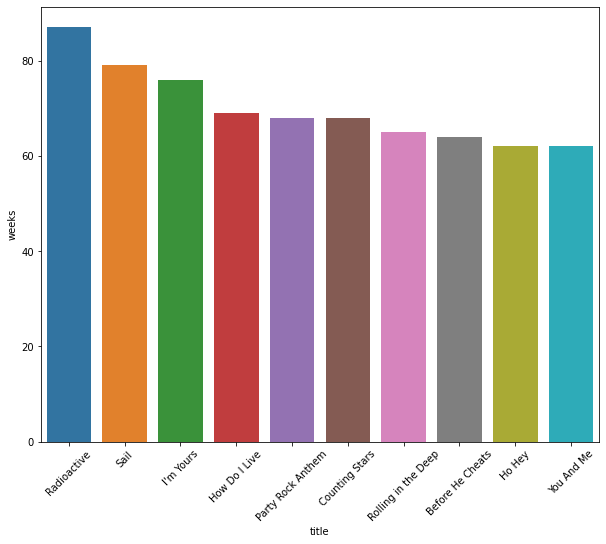

In [328]:
chart = sns.barplot(x="title",y="weeks",data = df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

## Canciones con mas tiempo en numero 1

In [329]:
df_hits_1 = df_hits.drop(df_hits[df_hits["rank"]>1].index)

In [330]:
print (df_hits_1.groupby(["id","artist","title"]).count().sort_values("weeks",ascending = False).iloc[:15]["weeks"])

id                      artist           title                                                  
2YpeDb67231RjR0MgVLzsG  Lil Nas X        Old Town Road - Remix                                      19
6rPO02ozF3bM7NnOV4h6s2  Luis Fonsi       Despacito - Remix                                          16
7ySbfLwdCwl1EM0zNCJZ38  Mariah Carey     One Sweet Day                                              16
32OlwWuMpZ6b0aN2RZOeMS  Mark Ronson      Uptown Funk (feat. Bruno Mars)                             14
61sQYdFNS6sEBYCyr1q5gn  Boyz II Men      I'll Make Love To You                                      14
3LmvfNUQtglbTrydsdIqFU  Mariah Carey     We Belong Together                                         14
4eHbdreAnSOrDDsFfc4Fpm  Whitney Houston  I Will Always Love You                                     14
5LjSxAIKwyZvQqJ04ZQ0Da  Elton John       Something About The Way You Look Tonight - Edit Version    14
2df5QsXucx4VLiHNGusXD5  Los Del Rio      Macarena - Bayside Boys Remix         

## Canciones que comenzaron siendo numero 1

In [331]:
df_hits[(df_hits["isNew"]==True) &
       (df_hits["rank"]==1)].sort_values(["rank","year_chart"],ascending=True).head(100)[["artist","title","rank"]]

,artist,title,rank
0,Ricky Nelson,Poor Little Fool - Remastered,1
173282,Michael Jackson,You Are Not Alone,1
173676,Mariah Carey,Fantasy,1
174462,Whitney Houston,Exhale (Shoop Shoop) - from Waiting to Exhale ...,1
174560,Mariah Carey,One Sweet Day,1
182283,Diddy,I'll Be Missing You (feat. 112),1
183463,Mariah Carey,Honey,1
183824,Elton John,Something About The Way You Look Tonight - Edi...,1
185663,Céline Dion,"My Heart Will Go On - Love Theme from ""Titanic""",1
188102,Aerosmith,"I Don't Want to Miss a Thing - From ""Armageddo...",1


In [332]:
len(df_hits[(df_hits["isNew"]==True) &
       (df_hits["rank"]==1)].sort_values(["rank","year_chart"],ascending=True).head(100)[["artist","title","rank"]])

43

## Compañias discograficas con mas hits

In [333]:
print (df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"])

label
Columbia                926
Capitol Records         803
Rhino Atlantic          761
Geffen                  680
Rhino                   525
Rhino/Warner Records    516
Columbia/Legacy         479
UNI/MOTOWN              472
Legacy Recordings       444
RCA Records Label       441
Name: id, dtype: int64


In [334]:
labels = df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:]["id"]

In [335]:
labels_dict = labels.to_dict()

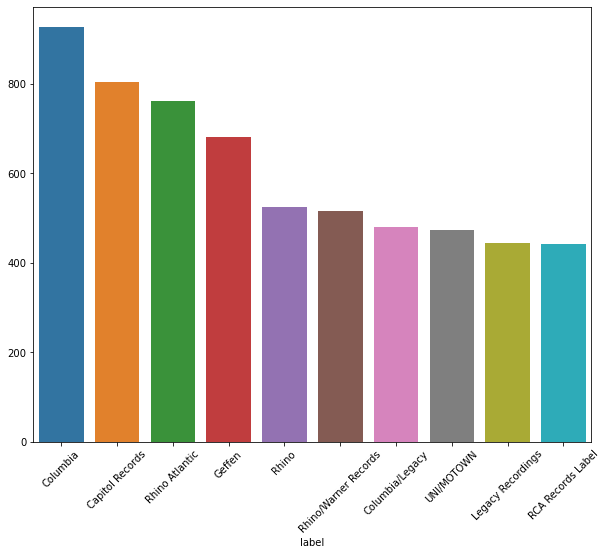

In [336]:
labels_bar_data = df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"]
chart = sns.barplot(labels_bar_data.index, labels_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [337]:
df_label_years = df_hits_uniq.groupby(["label","year_chart"])\
.count().sort_values('id',ascending=False).iloc[:]["id"].reset_index()

In [338]:
df_label_10 = df_label_years [(df_label_years["label"] == labels_bar_data.index[0]) |
                                (df_label_years["label"] == labels_bar_data.index[1]) |
                                (df_label_years["label"] == labels_bar_data.index[2]) |
                                (df_label_years["label"] == labels_bar_data.index[3]) |
                                (df_label_years["label"] == labels_bar_data.index[4]) |
                                (df_label_years["label"] == labels_bar_data.index[5]) |
                                (df_label_years["label"] == labels_bar_data.index[6]) |
                                (df_label_years["label"] == labels_bar_data.index[7]) |
                                (df_label_years["label"] == labels_bar_data.index[8]) |
                                (df_label_years["label"] == labels_bar_data.index[9])]
df_label_10 = df_label_10.rename(columns={"id":"count"})
df_label_10 = df_label_10.astype({"count": float})

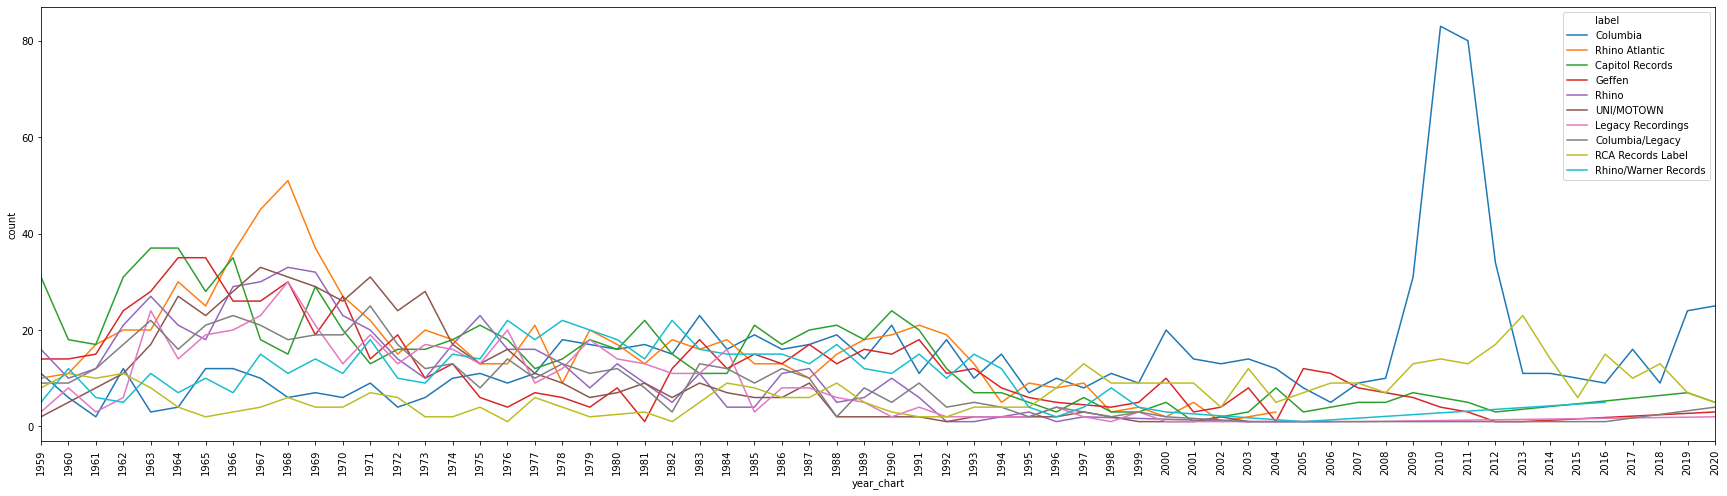

In [339]:
a_dims = (30, 8)
fig, ax = plt.subplots(figsize=a_dims)
ax.set_xlim(1959,2020)
ax.set_xticks(range(1959,2021))
chart  = sns.lineplot(x="year_chart", y="count",hue="label", data=df_label_10);
plt.setp(chart.get_xticklabels(),rotation=90);

In [340]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2009) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast            24
Bow Wow               1
John Mayer            1
Boys Like Girls       1
Bruce Springsteen     1
The Ting Tings        1
Mary Mary             1
Maxwell               1
Name: artist, dtype: int64

In [341]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2010) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast          76
John Mayer          2
Maxwell             2
Train               2
Boys Like Girls     1
Name: artist, dtype: int64

In [342]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2011) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast           73
Train                3
Mary Mary            1
Steven Tyler         1
Kreayshawn           1
Miranda Cosgrove     1
Name: artist, dtype: int64

In [343]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2018) &
                 (df_hits_uniq["label"]=="Republic Records")]["artist"].value_counts()

Post Malone               17
Ariana Grande              8
Metro Boomin               6
NAV                        2
Drake                      1
Ski Mask The Slump God     1
Name: artist, dtype: int64

In [344]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2019) &
                 (df_hits_uniq["label"]=="Republic Records")]["artist"].value_counts()

Ariana Grande             15
Post Malone               14
Lil Tecca                  4
Drake                      2
Ski Mask The Slump God     2
Metro Boomin               1
Jacquees                   1
Name: artist, dtype: int64

## Géneros musicales mas comunes en hits

In [345]:
all_genres = []
genres_aux = []
for genre in df_hits_uniq["genres"]:
    genres_aux.clear()
    list_genre = ast.literal_eval(genre) 
    subs_pop = "pop"
    res = [i for i in list_genre if subs_pop in i] 
    if len(res)>0:
        genres_aux.append("pop")
    subs_rock = "rock"
    res = [i for i in list_genre if subs_rock in i] 
    if len(res)>0:
        genres_aux.append("rock")
    subs_mellow = "mellow gold"
    res = [i for i in list_genre if subs_mellow in i] 
    if len(res)>0:
        genres_aux.append("rock")
    subs_rap = "rap"
    res = [i for i in list_genre if subs_rap in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary")
    subs_hip_hop = "hip hop"
    res = [i for i in list_genre if subs_hip_hop in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary")
    subs_urban = "urban contemporary"
    res = [i for i in list_genre if subs_urban in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary")
    subs_dance = "dance"
    res = [i for i in list_genre if subs_dance in i] 
    if len(res)>0:
        genres_aux.append("dance")
    subs_disco = "disco"
    res = [i for i in list_genre if subs_disco in i] 
    if len(res)>0:
        genres_aux.append("dance")
    subs_house = "house"
    res = [i for i in list_genre if subs_house in i] 
    if len(res)>0:
        genres_aux.append("dance")
    subs_classical = "classical"
    res = [i for i in list_genre if subs_classical in i] 
    if len(res)>0:
        genres_aux.append("classical")   
    subs_soul = "soul"
    res = [i for i in list_genre if subs_soul in i] 
    if len(res)>0:
        genres_aux.append("soul")   
    subs_rb = "r&b"
    res = [i for i in list_genre if subs_rb in i] 
    if len(res)>0:
        genres_aux.append("urban contemporary") 
    subs_country = "country"
    res = [i for i in list_genre if subs_country in i] 
    if len(res)>0:
        genres_aux.append("country") 
    subs_metal = "metal"
    res = [i for i in list_genre if subs_metal in i] 
    if len(res)>0:
        genres_aux.append("metal") 
    subs_folk = "folk"
    res = [i for i in list_genre if subs_folk in i] 
    if len(res)>0:
        genres_aux.append("folk") 
    subs_blues = "blues"
    res = [i for i in list_genre if subs_blues in i] 
    if len(res)>0:
        genres_aux.append("blues") 
    subs_jazz = "jazz"
    res = [i for i in list_genre if subs_jazz in i] 
    if len(res)>0:
        genres_aux.append("jazz") 
    subs_indie = "indie"
    res = [i for i in list_genre if subs_indie in i] 
    if len(res)>0:
        genres_aux.append("indie") 
    subs_funk = "funk"
    res = [i for i in list_genre if subs_funk in i] 
    if len(res)>0:
        genres_aux.append("funk")
    subs_reggae = "reggae"
    res = [i for i in list_genre if subs_reggae in i] 
    if len(res)>0:
        genres_aux.append("reggae") 
    subs_motown = "motown"
    res = [i for i in list_genre if subs_motown in i] 
    if len(res)>0:
        genres_aux.append("soul") 
    subs_songwriter = "singer-songwriter"
    res = [i for i in list_genre if subs_songwriter in i] 
    if len(res)>0:
        genres_aux.append("singer-songwriter") 
    subs_swing = "swing"
    res = [i for i in list_genre if subs_swing in i] 
    if len(res)>0:
        genres_aux.append("swing") 
        

    all_genres += list(dict.fromkeys(genres_aux))
    
    res = [i for i in list_genre if not subs_pop in i] 
    res = [i for i in res if not subs_rock in i] 
    res = [i for i in res if not subs_rap in i] 
    res = [i for i in res if not subs_hip_hop in i] 
    res = [i for i in res if not subs_dance in i] 
    res = [i for i in res if not subs_disco in i] 
    res = [i for i in res if not subs_house in i] 
    res = [i for i in res if not subs_classical in i] 
    res = [i for i in res if not subs_soul in i] 
    res = [i for i in res if not subs_rb in i] 
    res = [i for i in res if not subs_country in i] 
    res = [i for i in res if not subs_metal in i] 
    res = [i for i in res if not subs_folk in i] 
    res = [i for i in res if not subs_blues in i] 
    res = [i for i in res if not subs_jazz in i] 
    res = [i for i in res if not subs_indie in i] 
    res = [i for i in res if not subs_funk in i] 
    res = [i for i in res if not subs_reggae in i] 
    res = [i for i in res if not subs_mellow in i] 
    res = [i for i in res if not subs_urban in i] 
    res = [i for i in res if not subs_motown in i] 
    res = [i for i in res if not subs_songwriter in i] 
    res = [i for i in res if not subs_swing in i] 
    
    all_genres += res
count_genres_years = Counter(all_genres)
count_genres_10 = count_genres_years.most_common()[:10]

In [346]:
df_count_genres_10 = pd.DataFrame(count_genres_10, columns =['genre', 'count'])
print (df_count_genres_10)

                genre  count
0                 pop  11882
1                rock   9935
2               dance   5524
3  urban contemporary   5230
4                soul   4141
5             country   3420
6     adult standards   2971
7                folk   2966
8                funk   2162
9         quiet storm   2101


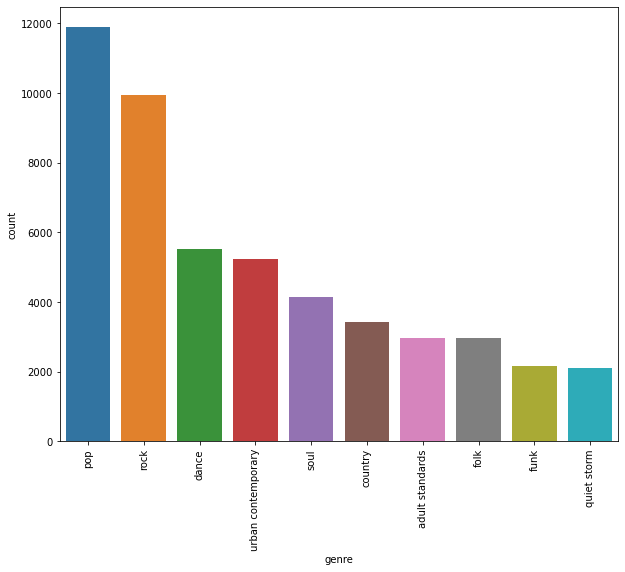

In [347]:
chart = sns.barplot (x="genre", y= "count",data= df_count_genres_10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Evolución de géneros en el tiempo

In [348]:
def genres_year (year):
    all_genres = []
    genres_aux = []
    for genre in df_hits_uniq.loc[df_hits_uniq["year_chart"]==year]["genres"]:
        genres_aux.clear()
        list_genre = ast.literal_eval(genre) 
        subs_pop = "pop"
        res = [i for i in list_genre if subs_pop in i] 
        if len(res)>0:
            genres_aux.append("pop")
        subs_rock = "rock"
        res = [i for i in list_genre if subs_rock in i] 
        if len(res)>0:
            genres_aux.append("rock")
        subs_mellow = "mellow gold"
        res = [i for i in list_genre if subs_mellow in i] 
        if len(res)>0:
            genres_aux.append("rock")
        subs_rap = "rap"
        res = [i for i in list_genre if subs_rap in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary")
        subs_hip_hop = "hip hop"
        res = [i for i in list_genre if subs_hip_hop in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary")
        subs_urban = "urban contemporary"
        res = [i for i in list_genre if subs_urban in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary")
        subs_dance = "dance"
        res = [i for i in list_genre if subs_dance in i] 
        if len(res)>0:
            genres_aux.append("dance")
        subs_disco = "disco"
        res = [i for i in list_genre if subs_disco in i] 
        if len(res)>0:
            genres_aux.append("dance")
        subs_house = "house"
        res = [i for i in list_genre if subs_house in i] 
        if len(res)>0:
            genres_aux.append("dance")
        subs_classical = "classical"
        res = [i for i in list_genre if subs_classical in i] 
        if len(res)>0:
            genres_aux.append("classical")   
        subs_soul = "soul"
        res = [i for i in list_genre if subs_soul in i] 
        if len(res)>0:
            genres_aux.append("soul")   
        subs_rb = "r&b"
        res = [i for i in list_genre if subs_rb in i] 
        if len(res)>0:
            genres_aux.append("urban contemporary") 
        subs_country = "country"
        res = [i for i in list_genre if subs_country in i] 
        if len(res)>0:
            genres_aux.append("country") 
        subs_metal = "metal"
        res = [i for i in list_genre if subs_metal in i] 
        if len(res)>0:
            genres_aux.append("metal") 
        subs_folk = "folk"
        res = [i for i in list_genre if subs_folk in i] 
        if len(res)>0:
            genres_aux.append("folk") 
        subs_blues = "blues"
        res = [i for i in list_genre if subs_blues in i] 
        if len(res)>0:
            genres_aux.append("blues") 
        subs_jazz = "jazz"
        res = [i for i in list_genre if subs_jazz in i] 
        if len(res)>0:
            genres_aux.append("jazz") 
        subs_indie = "indie"
        res = [i for i in list_genre if subs_indie in i] 
        if len(res)>0:
            genres_aux.append("indie") 
        subs_funk = "funk"
        res = [i for i in list_genre if subs_funk in i] 
        if len(res)>0:
            genres_aux.append("funk")
        subs_reggae = "reggae"
        res = [i for i in list_genre if subs_reggae in i] 
        if len(res)>0:
            genres_aux.append("reggae") 
        subs_motown = "motown"
        res = [i for i in list_genre if subs_motown in i] 
        if len(res)>0:
            genres_aux.append("soul") 
        subs_songwriter = "singer-songwriter"
        res = [i for i in list_genre if subs_songwriter in i] 
        if len(res)>0:
            genres_aux.append("singer-songwriter") 
        subs_swing = "swing"
        res = [i for i in list_genre if subs_swing in i] 
        if len(res)>0:
            genres_aux.append("swing") 


        all_genres += list(dict.fromkeys(genres_aux))

        res = [i for i in list_genre if not subs_pop in i] 
        res = [i for i in res if not subs_rock in i] 
        res = [i for i in res if not subs_rap in i] 
        res = [i for i in res if not subs_hip_hop in i] 
        res = [i for i in res if not subs_dance in i] 
        res = [i for i in res if not subs_disco in i] 
        res = [i for i in res if not subs_house in i] 
        res = [i for i in res if not subs_classical in i] 
        res = [i for i in res if not subs_soul in i] 
        res = [i for i in res if not subs_rb in i] 
        res = [i for i in res if not subs_country in i] 
        res = [i for i in res if not subs_metal in i] 
        res = [i for i in res if not subs_folk in i] 
        res = [i for i in res if not subs_blues in i] 
        res = [i for i in res if not subs_jazz in i] 
        res = [i for i in res if not subs_indie in i] 
        res = [i for i in res if not subs_funk in i] 
        res = [i for i in res if not subs_reggae in i] 
        res = [i for i in res if not subs_mellow in i] 
        res = [i for i in res if not subs_urban in i] 
        res = [i for i in res if not subs_motown in i] 
        res = [i for i in res if not subs_songwriter in i] 
        res = [i for i in res if not subs_swing in i] 

        all_genres += res
    count_genres_years = Counter(all_genres)
    count_genres_years = count_genres_years.most_common()
    df_count_genres_years = pd.DataFrame(count_genres_years, columns =['genre', 'count'])
    df_count_genres_years["year"]=year
    return df_count_genres_years

In [349]:
years = range (1958,2021)
df_genres_years = pd.DataFrame(columns=("genre","count","year"))
for year in years:
    df_genres_year = genres_year (year)
    frames = [df_genres_years, df_genres_year]
    df_genres_years = pd.concat(frames)
df_genres_years = df_genres_years.astype({"count": float})

In [350]:
df_genres_10 = df_genres_years[(df_genres_years["genre"]== df_count_genres_10["genre"][0]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][1]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][2]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][3]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][4]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][5]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][6]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][7]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][8]) |
                               (df_genres_years["genre"]== df_count_genres_10["genre"][9])]

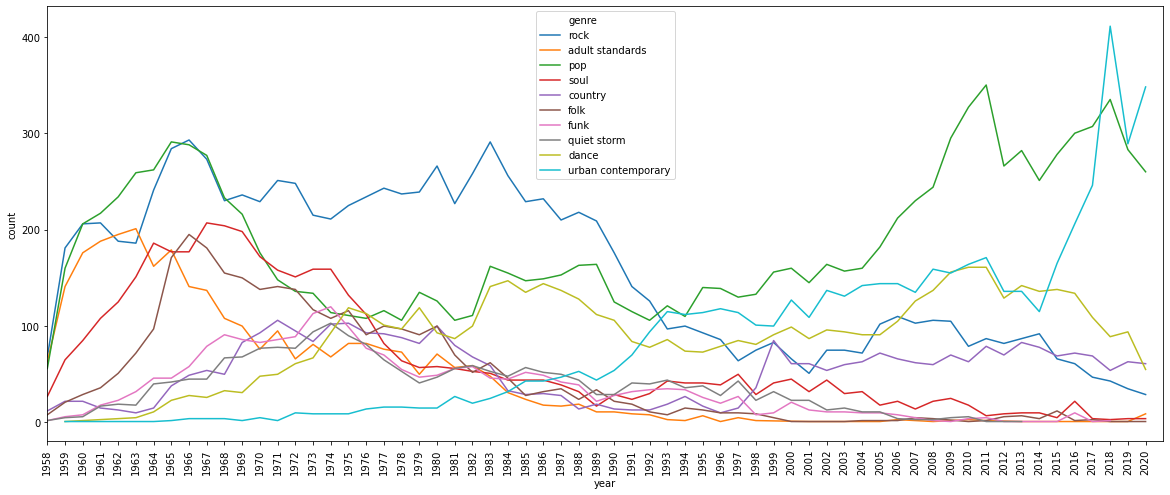

In [351]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xlim(1958,2021)
ax.set_xticks(years)
chart = sns.lineplot(x="year", y="count",hue="genre", data=df_genres_10);
plt.setp(chart.get_xticklabels(),rotation=90);

## Colaboraciones

In [352]:
print (df_hits_uniq["collaboration"].value_counts())

False    22235
True      3332
Name: collaboration, dtype: int64


In [353]:
print (df_hits_uniq.groupby("year_chart").sum().sort_values('collaboration',ascending=False).iloc[:]["collaboration"])

year_chart
2018    231.0
2020    205.0
2019    188.0
2017    181.0
2011    146.0
        ...  
1958     13.0
1985     12.0
1981     12.0
1982     11.0
1979     11.0
Name: collaboration, Length: 63, dtype: float64


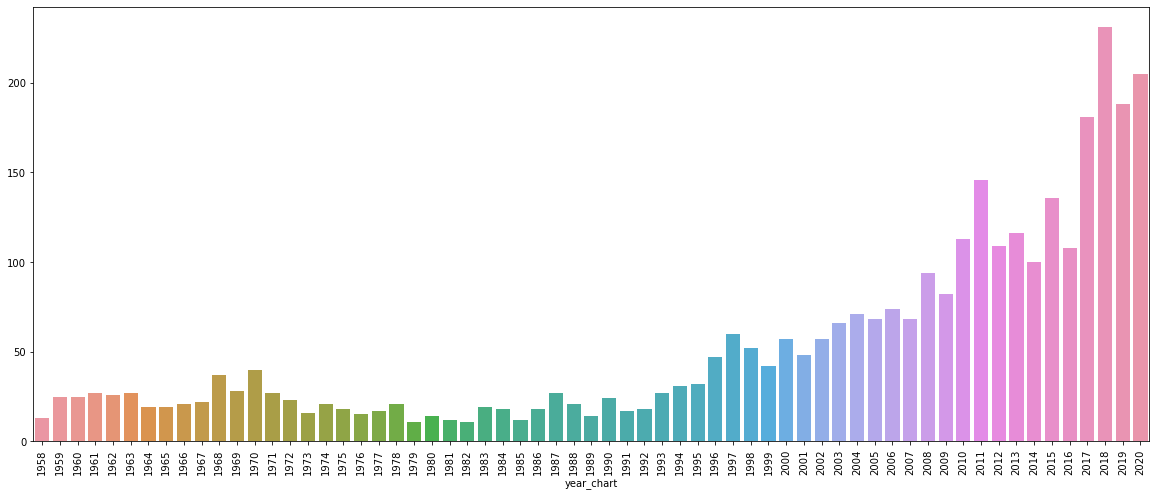

In [354]:
a_dims = (20, 8)
fig, ax = plt.subplots(figsize=a_dims)
hits_bar_data = df_hits_uniq.groupby("year_chart").sum().sort_values('collaboration',ascending=False).iloc[:]["collaboration"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [355]:
print (df_hits_uniq.groupby("artist").sum().sort_values('collaboration',ascending=False).iloc[:10]["collaboration"])

artist
Drake          51.0
Lil Wayne      38.0
Glee Cast      34.0
JAY-Z          30.0
Kanye West     29.0
Eminem         29.0
DJ Khaled      29.0
Meek Mill      27.0
Future         24.0
Chris Brown    22.0
Name: collaboration, dtype: float64


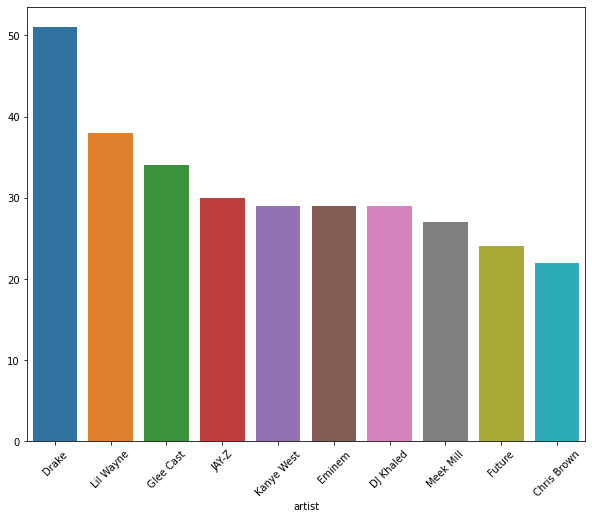

In [356]:
hits_bar_data = df_hits_uniq.groupby("artist").sum().sort_values('collaboration',ascending=False).iloc[:10]["collaboration"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [357]:
for index, value in hits_bar_data.iteritems():
    print ("Artist: ",index,"--> genres:" ,df_hits_uniq.loc[(df_hits_uniq["artist"]==index).idxmax(),"genres"])

Artist:  Drake --> genres: ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
Artist:  Lil Wayne --> genres: ['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
Artist:  Glee Cast --> genres: ['glee club', 'hollywood', 'post-teen pop', 'viral pop']
Artist:  JAY-Z --> genres: ['east coast hip hop', 'hip hop', 'pop rap', 'rap']
Artist:  Kanye West --> genres: ['chicago rap', 'rap']
Artist:  Eminem --> genres: ['detroit hip hop', 'hip hop', 'rap']
Artist:  DJ Khaled --> genres: ['dance pop', 'dirty south rap', 'hip hop', 'miami hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'urban contemporary']
Artist:  Meek Mill --> genres: ['hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
Artist:  Future --> genres: ['atl hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
Artist:  Chris Brown --> genres: ['dance pop', 'pop', 'pop rap', 'r&b', 'rap']


## Albumes con mas hits

In [358]:
print (df_hits_uniq.groupby(["album","artist"]).count().sort_values('title',ascending=False).iloc[:30]["title"])
6,7,9,11,14

album                                                         artist          
Gold                                                          Connie Francis      35
Glee: The Music, The Complete Season Three                    Glee Cast           32
Glee: The Music, The Complete Season Two                      Glee Cast           30
Scorpion                                                      Drake               25
More Life                                                     Drake               22
Tha Carter V                                                  Lil Wayne           21
The Complete Original Chart Hits 1964-1969                    Ronnie Dove         20
Greatest Hits: The Mercury Years                              Brook Benton        20
Views                                                         Drake               19
25 All-Time Greatest Hits                                     Johnny Tillotson    18
Starboy                                                       The Weekn

In [412]:
s_albums_hit = df_hits_uniq.groupby(["album","artist"]).count().sort_values('title',ascending=False).iloc[:30]["title"]

In [417]:
s_albums_clean = s_albums_hit.drop(labels=[s_albums_hit.index[0],
                                            s_albums_hit.index[6],
                                            s_albums_hit.index[7],
                                            s_albums_hit.index[9],
                                            s_albums_hit.index[11],
                                            s_albums_hit.index[14],
                                            s_albums_hit.index[15],
                                            s_albums_hit.index[17],
                                            s_albums_hit.index[20],
                                            s_albums_hit.index[25],
                                            s_albums_hit.index[26],
                                            s_albums_hit.index[28]])

In [418]:
print(s_albums_clean)

album                                       artist       
Glee: The Music, The Complete Season Three  Glee Cast        32
Glee: The Music, The Complete Season Two    Glee Cast        30
Scorpion                                    Drake            25
More Life                                   Drake            22
Tha Carter V                                Lil Wayne        21
Views                                       Drake            19
Starboy                                     The Weeknd       18
beerbongs & bentleys                        Post Malone      18
Shoot For The Stars Aim For The Moon        Pop Smoke        17
ASTROWORLD                                  Travis Scott     17
Glee: The Music, Volume 3 Showstoppers      Glee Cast        17
Lover                                       Taylor Swift     17
Hollywood's Bleeding                        Post Malone      16
Eternal Atake                               Lil Uzi Vert     16
folklore                                    Ta

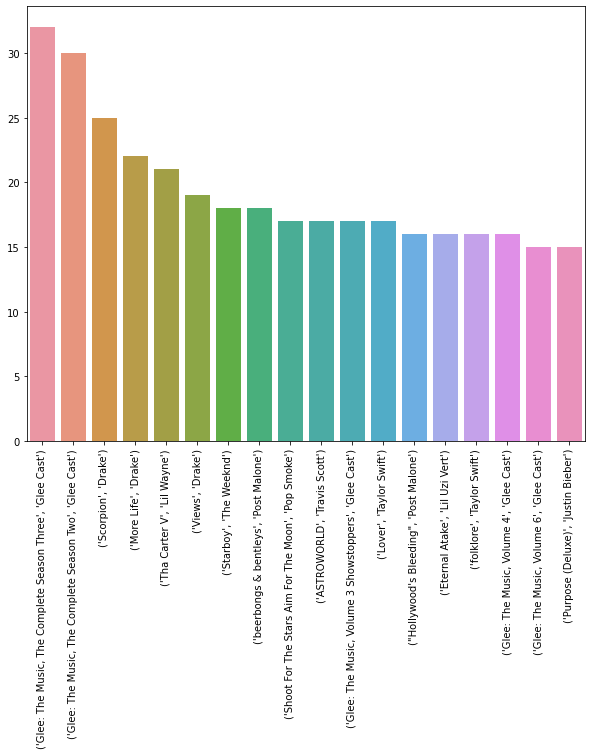

In [419]:
chart = sns.barplot(s_albums_clean.index, s_albums_clean.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);